In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [2]:
#read jsonl file
df = pd.read_json('./data/metadata.jsonl', lines=True)
df.head()

file_name        text_prompt
0  train/sample_0.png  Low masking level
1  train/sample_1.png  Low masking level
2  train/sample_2.png  Low masking level
3  train/sample_3.png  Low masking level
4  train/sample_4.png  Low masking level

In [3]:
#convert text prompt to 0,1,2 instead of Low, Medium, High respectively
df['text_prompt'] = df['text_prompt'].map({'Low masking level': 0, 'Medium masking level': 1, 'High masking level': 2})

df.head()

file_name  text_prompt
0  train/sample_0.png            0
1  train/sample_1.png            0
2  train/sample_2.png            0
3  train/sample_3.png            0
4  train/sample_4.png            0

In [4]:
#what is the distribution of the data
df['text_prompt'].value_counts()

text_prompt
0    33333
1    33333
2    33333
Name: count, dtype: int64

In [5]:
labels = []
#read labels from jsonl file
for i in range(99999):
    labels.append(df['text_prompt'][i])

print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [6]:
#load png files

processed_folder = './data/processed/'
num_required_images = 99999

#check if the processed folder exists and has enough images
if os.path.exists(processed_folder) and len(os.listdir(processed_folder)) >= num_required_images:
    print('Processed folder exists and has enough images')
    images = []
    for i in range(num_required_images):
        print("Loading image", i)
        img = Image.open(os.path.join(processed_folder, 'sample_' + str(i) + '.png'))
        img = img.convert('L')
        img_array = np.array(img)
        images.append(img_array)
else:
    #process and save images
    print('Processing and saving images')
    images = []
    original_folder = './data/train/' 
    for i in range(num_required_images):
        print("Processing image", i)
        filename = 'sample_' + str(i) + '.png'

        #create the processed folder if it doesn't exist
        if not os.path.exists(processed_folder):
            os.makedirs(processed_folder)

        #process the image
        img = Image.open(os.path.join(original_folder, filename))
        img = img.resize((128, 160))
        img = img.convert('L')
        img_array = np.array(img)

        #save the processed image
        img.save(os.path.join(processed_folder, filename)) 

        images.append(img_array)

Processed folder exists and has enough images
Loading image 0
Loading image 1
Loading image 2
Loading image 3
Loading image 4
Loading image 5
Loading image 6
Loading image 7
Loading image 8
Loading image 9
Loading image 10
Loading image 11
Loading image 12
Loading image 13
Loading image 14
Loading image 15
Loading image 16
Loading image 17
Loading image 18
Loading image 19
Loading image 20
Loading image 21
Loading image 22
Loading image 23
Loading image 24
Loading image 25
Loading image 26
Loading image 27
Loading image 28
Loading image 29
Loading image 30
Loading image 31
Loading image 32
Loading image 33
Loading image 34
Loading image 35
Loading image 36
Loading image 37
Loading image 38
Loading image 39
Loading image 40
Loading image 41
Loading image 42
Loading image 43
Loading image 44
Loading image 45
Loading image 46
Loading image 47
Loading image 48
Loading image 49
Loading image 50
Loading image 51
Loading image 52
Loading image 53
Loading image 54
Loading image 55
Loading imag

(160, 128)


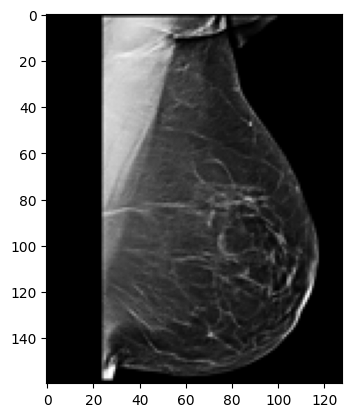

In [7]:
print(images[0].shape)
#are the images loaded correctly?
plt.imshow(images[0], cmap='gray')

In [11]:
#initial split of the data 80% train, 20% test
X_train_temp, X_test, y_train_temp, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

#further split the training data into 75% train, 25% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

#clear unused variables for memory
del X_train_temp
del y_train_temp
del images

Create and train the baseline model

In [8]:
#if modelV1.h5 exists, load it
try:
    modelV1 = keras.models.load_model('./models/modelV1.h5')
    print('Model loaded')
    print(modelV1.summary())
    print(modelV1.history)
    V1Created = True
except:
    V1Created = False
    print('Model not found')

2024-03-03 18:09:22.577014: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-03 18:09:22.577336: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-03 18:09:22.577713: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-03 18:09:22.578160: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-03 18:09:22.579061: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model loaded
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 158, 126, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 79, 63, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 79632)             0         
                                                                 
 dense (Dense)               (None, 3)                 238899    
                                                                 
Total params: 239059 (933.82 KB)
Trainable params: 239059 (933.82 KB)
Non-trainable params: 0 (0.00 Byte)
________

In [9]:
if not V1Created:
    inputs = keras.Input(shape=(160,128,1)) #resolution of images
    x = layers.Conv2D(16, 3, activation="relu")(inputs)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(3, activation="softmax")(x) #3 classes
    modelV1 = keras.Model(inputs=inputs, outputs=outputs)


In [10]:
modelV1.summary()
print(modelV1.history)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 158, 126, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 79, 63, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 79632)             0         
                                                                 
 dense (Dense)               (None, 3)                 238899    
                                                                 
Total params: 239059 (933.82 KB)
Trainable params: 239059 (933.82 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [12]:
#compile model if not loaded
if not V1Created:
    #legacy is faster on mac m1 chip
    modelV1.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [13]:
#train model if not loaded
if not V1Created:

    modelV1.fit(np.array(X_train), np.array(y_train), epochs=1, batch_size=16, validation_data=(np.array(X_val), np.array(y_val)))


In [14]:
#save model if not loaded
if not V1Created:
    modelV1.save('./models/modelV1.h5')

In [15]:
#show graph of training loss and validation loss

def plot_loss_accuracy(modelCreated, model, modelName):
    if not modelCreated:
        history_dict = model.history.history
        loss_values = history_dict["loss"]
        val_loss_values = history_dict["val_loss"]
        epochs = range(1, len(loss_values) + 1)
        plt.plot(epochs, loss_values, "bo", label="Training loss")
        plt.plot(epochs, val_loss_values, "b", label="Validation loss")
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend()
        plt.savefig('./models/' + modelName + '_loss.png')
        plt.show()
        
        plt.clf()
        plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
        plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend()
        plt.savefig('./models/' + modelName + '_accuracy.png')
        plt.show()
        
    else:
        img1 = Image.open('./models/' + modelName + '_loss.png')
        img2= Image.open('./models/' + modelName + '_accuracy.png')
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle('Model loss and accuracy')
        ax[0].imshow(img1)
        ax[0].axis('off')
        
        ax[1].imshow(img2)
        ax[1].axis('off')


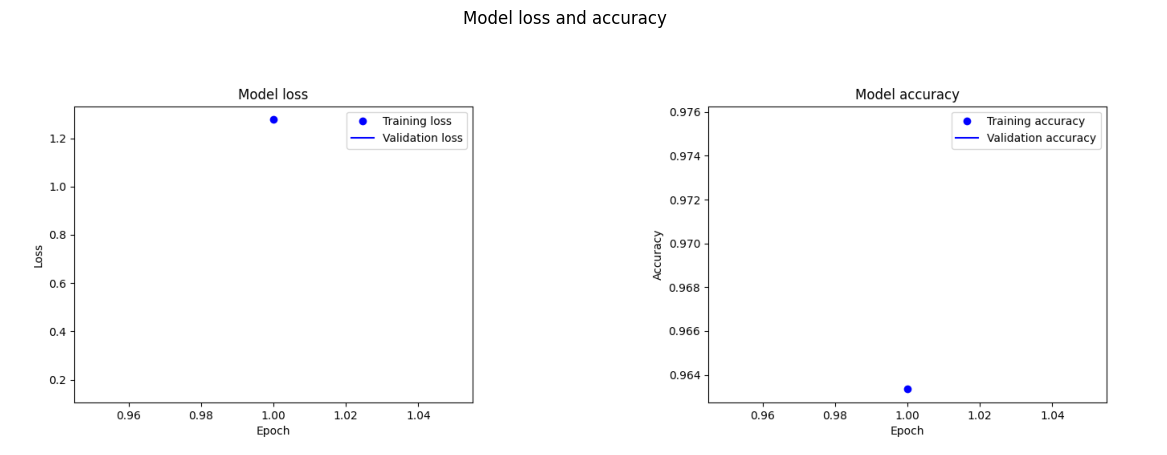

In [16]:
plot_loss_accuracy(V1Created, modelV1, 'modelV1')

In [17]:
#evaluate model
def evaluate_model(model, X_test, y_test, modelName):
    results = model.evaluate(np.array(X_test), np.array(y_test))
    
    #get predictions
    y_pred = model.predict(np.array(X_test))  
    
    #convert probabilities to class labels
    y_pred = np.argmax(y_pred, axis=1)  

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred) 

    print("Results:", results)
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Confusion Matrix:\n", conf_matrix)
    
    #plot confusion matrix with numbers and labels
    fig, ax = plt.subplots()
    im = ax.imshow(conf_matrix)
    
    ax.set_xticks(np.arange(3))
    ax.set_yticks(np.arange(3))
    ax.set_xticklabels(['Low', 'Medium', 'High'])
    ax.set_yticklabels(['Low', 'Medium', 'High'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    
    for i in range(3):
        for j in range(3):
            text = ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black",bbox=dict(facecolor='white'))
            

    ax.set_title("Confusion Matrix")
    fig.tight_layout()
    
    plt.show()
    
    #create a pandas series with the results
    results = pd.Series([modelName ,accuracy, f1, precision, recall], index=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
    return results

    


2024-03-03 18:09:25.144292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 12/625 [..............................] - ETA: 6s

2024-03-03 18:09:33.599095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 5s 8ms/step
Results: [0.13882388174533844, 0.9768499732017517]
Accuracy: 0.97685
F1 Score: 0.9767627858890039
Precision: 0.9771766914265317
Recall: 0.97685
Confusion Matrix:
 [[6625   48    2]
 [ 285 6352   85]
 [   2   41 6560]]


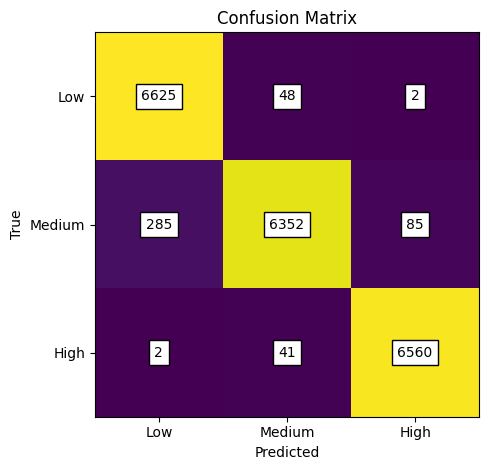

Model         modelV1
Accuracy      0.97685
F1 Score     0.976763
Precision    0.977177
Recall        0.97685
dtype: object

In [18]:
modeV1_results = evaluate_model(modelV1, X_test, y_test, 'modelV1')
modeV1_results

Values to tune:

- learning rate
- optimizer
- batch size
- epochs
- layers

Model loaded
Learning Rate: 0.1
  1/625 [..............................] - ETA: 2:39 - loss: 1.1016 - accuracy: 0.3125

2024-03-03 18:09:40.617964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  9/625 [..............................] - ETA: 9s

2024-03-03 18:09:48.726153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 6s 9ms/step
Results: [1.0989689826965332, 0.3361000120639801]
Accuracy: 0.3361
F1 Score: 0.16909394506399222
Precision: 0.11296321000000001
Recall: 0.3361
Confusion Matrix:
 [[   0 6675    0]
 [   0 6722    0]
 [   0 6603    0]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


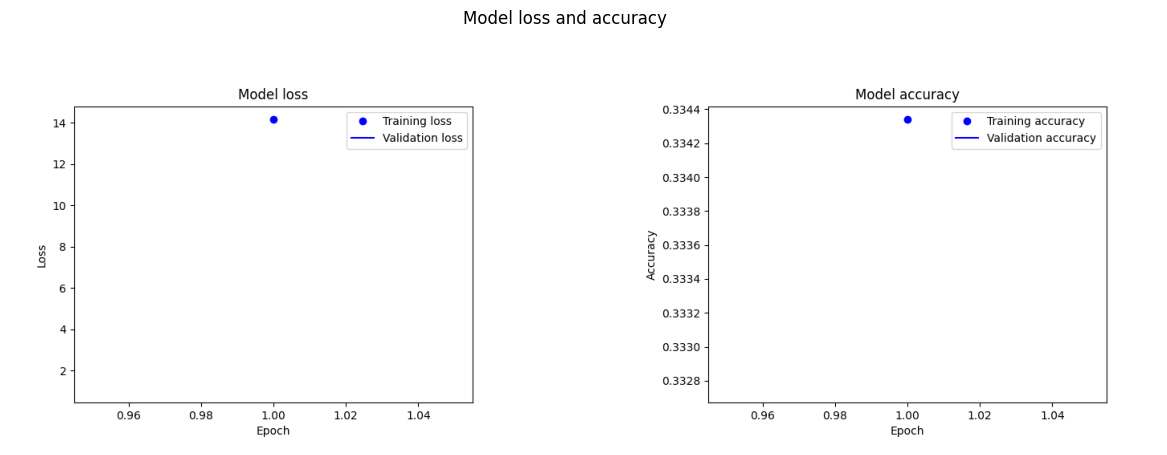

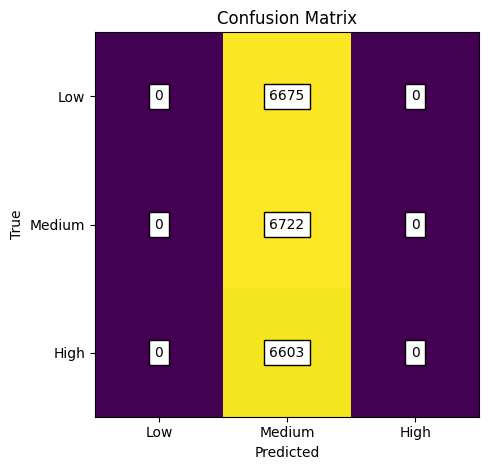

Model loaded
Learning Rate: 0.01
  4/625 [..............................] - ETA: 11s - loss: 0.3479 - accuracy: 0.8594 

2024-03-03 18:09:55.861604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  1/625 [..............................] - ETA: 2:12

2024-03-03 18:10:03.845696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 5s 8ms/step
Results: [0.3326594829559326, 0.8837000131607056]
Accuracy: 0.8837
F1 Score: 0.883565805812315
Precision: 0.8841983153762792
Recall: 0.8837
Confusion Matrix:
 [[6254  314  107]
 [ 587 5710  425]
 [ 131  762 5710]]


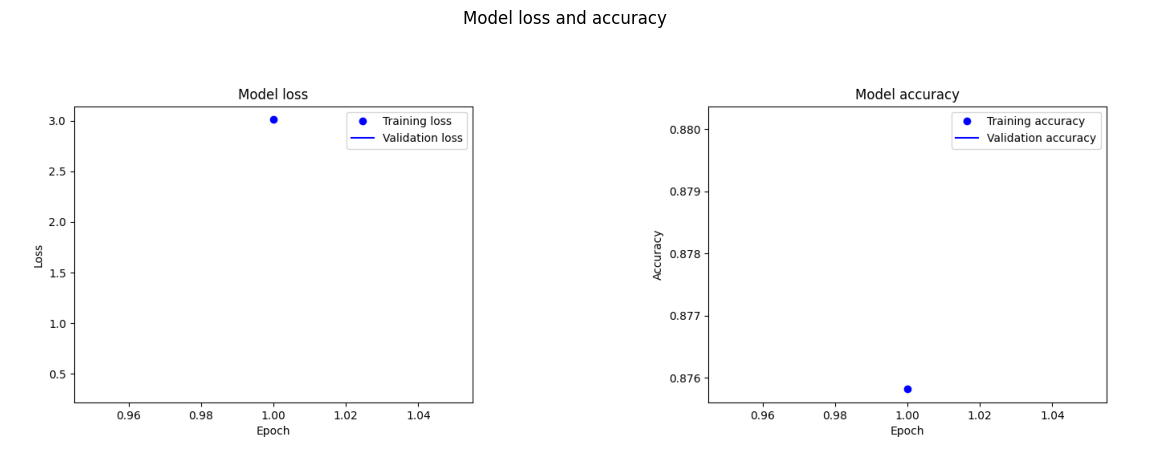

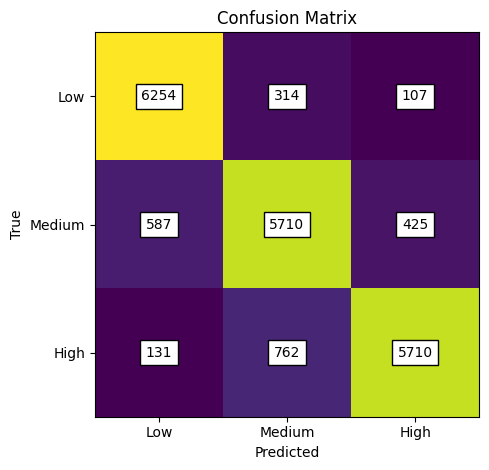

Model loaded
Learning Rate: 0.001
  5/625 [..............................] - ETA: 9s - loss: 0.4963 - accuracy: 0.9563  

2024-03-03 18:10:10.858600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  9/625 [..............................] - ETA: 9s

2024-03-03 18:10:20.649848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 7s 11ms/step
Results: [0.27738699316978455, 0.9674500226974487]
Accuracy: 0.96745
F1 Score: 0.9675297730913924
Precision: 0.969107979028746
Recall: 0.96745
Confusion Matrix:
 [[6196  477    2]
 [  12 6620   90]
 [   1   69 6533]]


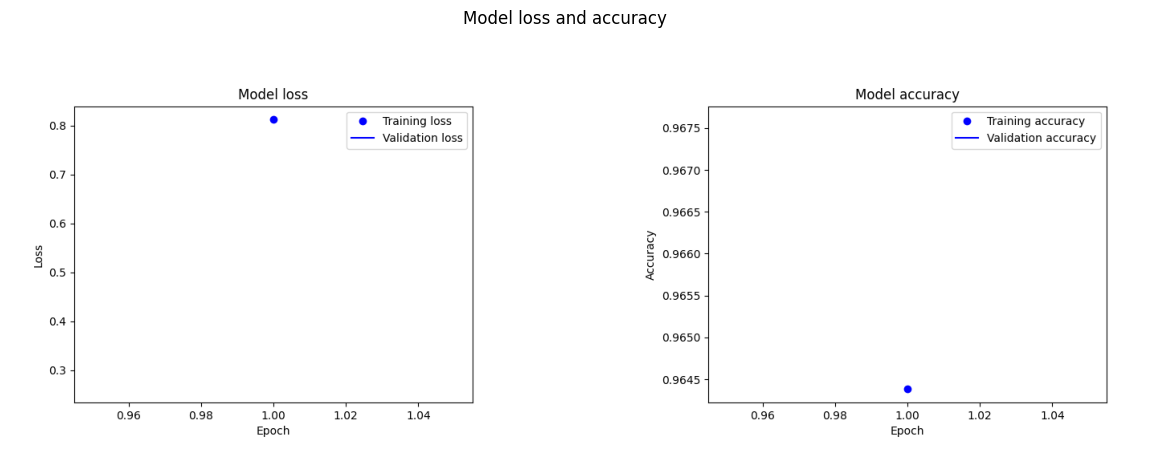

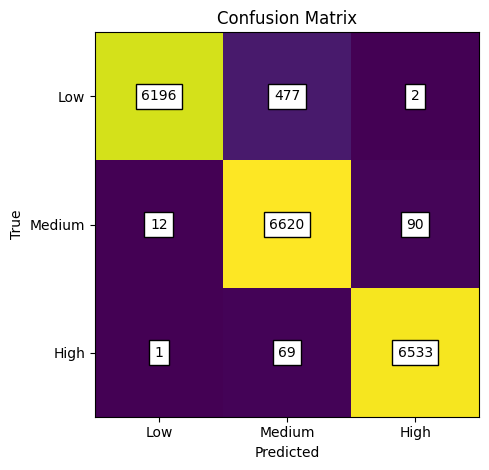

Model loaded
Learning Rate: 0.0001
  1/625 [..............................] - ETA: 2:26 - loss: 0.1616 - accuracy: 0.9688

2024-03-03 18:10:29.106757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  8/625 [..............................] - ETA: 11s

2024-03-03 18:10:39.064325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 7s 11ms/step
Results: [0.14349274337291718, 0.982450008392334]
Accuracy: 0.98245
F1 Score: 0.9824009056758656
Precision: 0.9825064814648422
Recall: 0.98245
Confusion Matrix:
 [[6629   43    3]
 [ 159 6467   96]
 [   1   49 6553]]


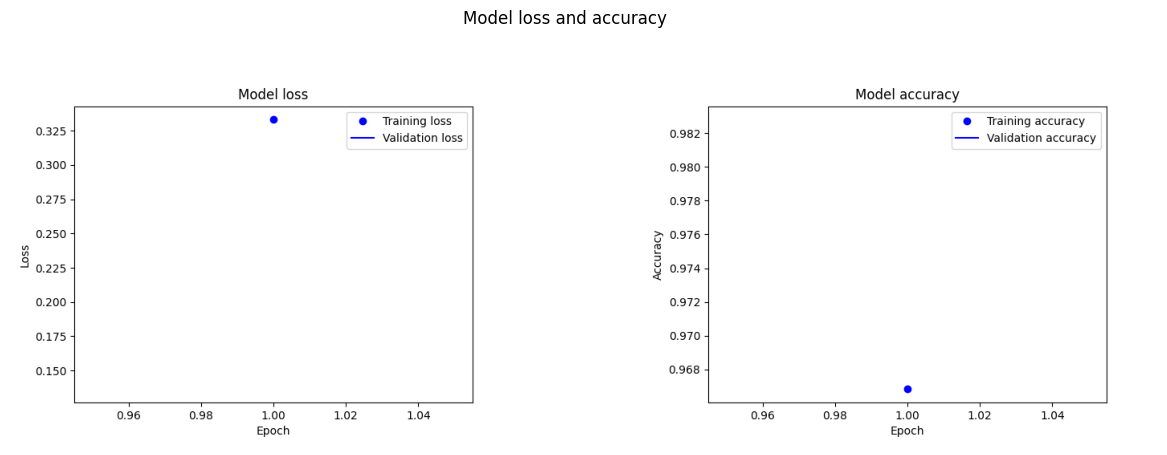

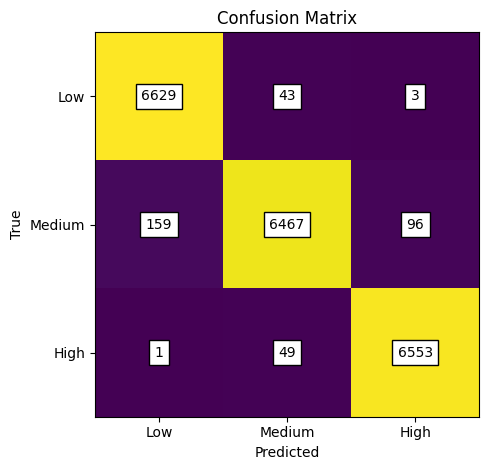

Model loaded
Learning Rate: 1e-05
  4/625 [..............................] - ETA: 14s - loss: 0.0381 - accuracy: 0.9844 

2024-03-03 18:10:47.405423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  8/625 [..............................] - ETA: 10s

2024-03-03 18:10:57.690376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 7s 11ms/step
Results: [0.2740277349948883, 0.9609000086784363]
Accuracy: 0.9609
F1 Score: 0.960660090874092
Precision: 0.9625574620649122
Recall: 0.9609
Confusion Matrix:
 [[6649   26    0]
 [ 561 6060  101]
 [   9   85 6509]]


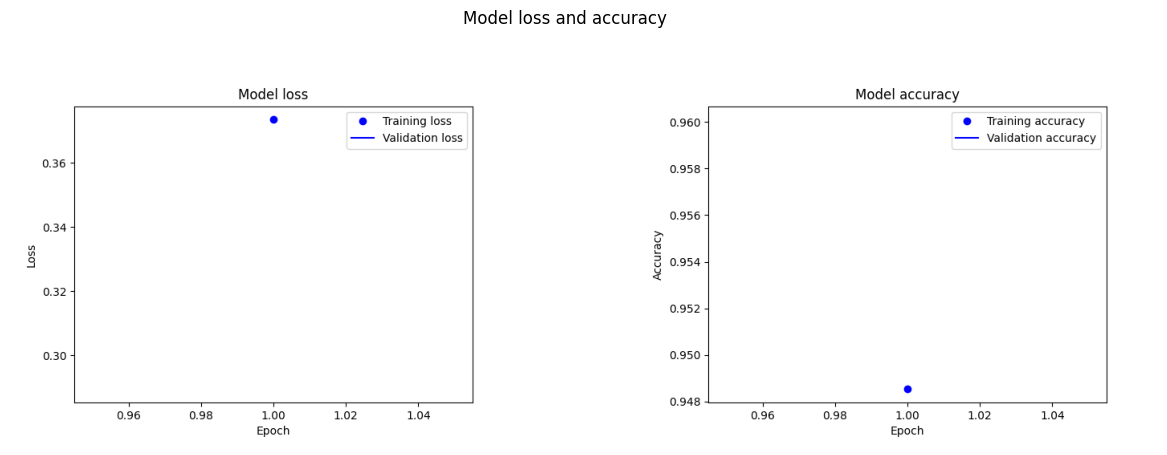

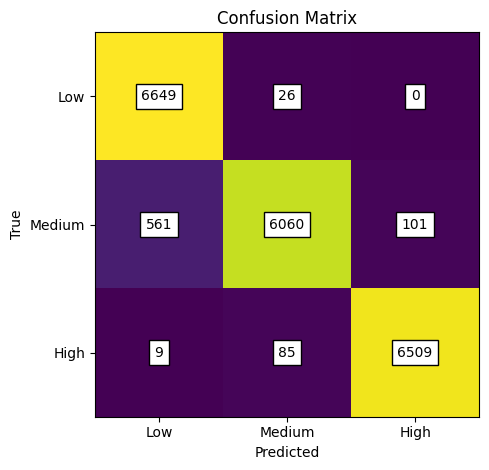

In [19]:
#tuning different learning rates
#modelv1 uses adam optimizer, so it had a default learning rate of 0.001
#we will try learning rates of 0.1, 0.01, 0.0001

lr_df = pd.DataFrame(columns=['Learning Rate', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]

for rate in learning_rates:
    
    #try load already built model
    try:
        model_name = 'modelV1_lr_'+ str(rate)
        model = keras.models.load_model('./models/'+model_name+'.h5')
        print('Model loaded')
        modelCreated = True
    except:
        modelCreated = False
        print('Model not found')
        
    print("Learning Rate:", rate)
    
    if not modelCreated:
        #same model as modelV1, but with different learning rates
        inputs = keras.Input(shape=(160,128,1)) #resolution of images
        x = layers.Conv2D(16, 3, activation="relu")(inputs)
        x = layers.MaxPooling2D(pool_size=2)(x)
        x = layers.Flatten()(x)
        outputs = layers.Dense(3, activation="softmax")(x) #3 classes
        model = keras.Model(inputs=inputs, outputs=outputs)
        
        model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=rate),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
        model.fit(np.array(X_train), np.array(y_train), epochs=1, batch_size=16, validation_data=(np.array(X_val), np.array(y_val)))
        
        model.save('./models/'+ model_name + '.h5')

    plot_loss_accuracy(modelCreated, model, model_name)
    results = evaluate_model(model, X_test, y_test, model_name)
    results['Learning Rate'] = rate
    lr_df.loc[len(lr_df.index)] = results

In [20]:
#show the table results for each learning rate
lr_df

Learning Rate Accuracy  F1 Score Precision   Recall
0           0.1   0.3361  0.169094  0.112963   0.3361
1          0.01   0.8837  0.883566  0.884198   0.8837
2         0.001  0.96745   0.96753  0.969108  0.96745
3        0.0001  0.98245  0.982401  0.982506  0.98245
4       0.00001   0.9609   0.96066  0.962557   0.9609

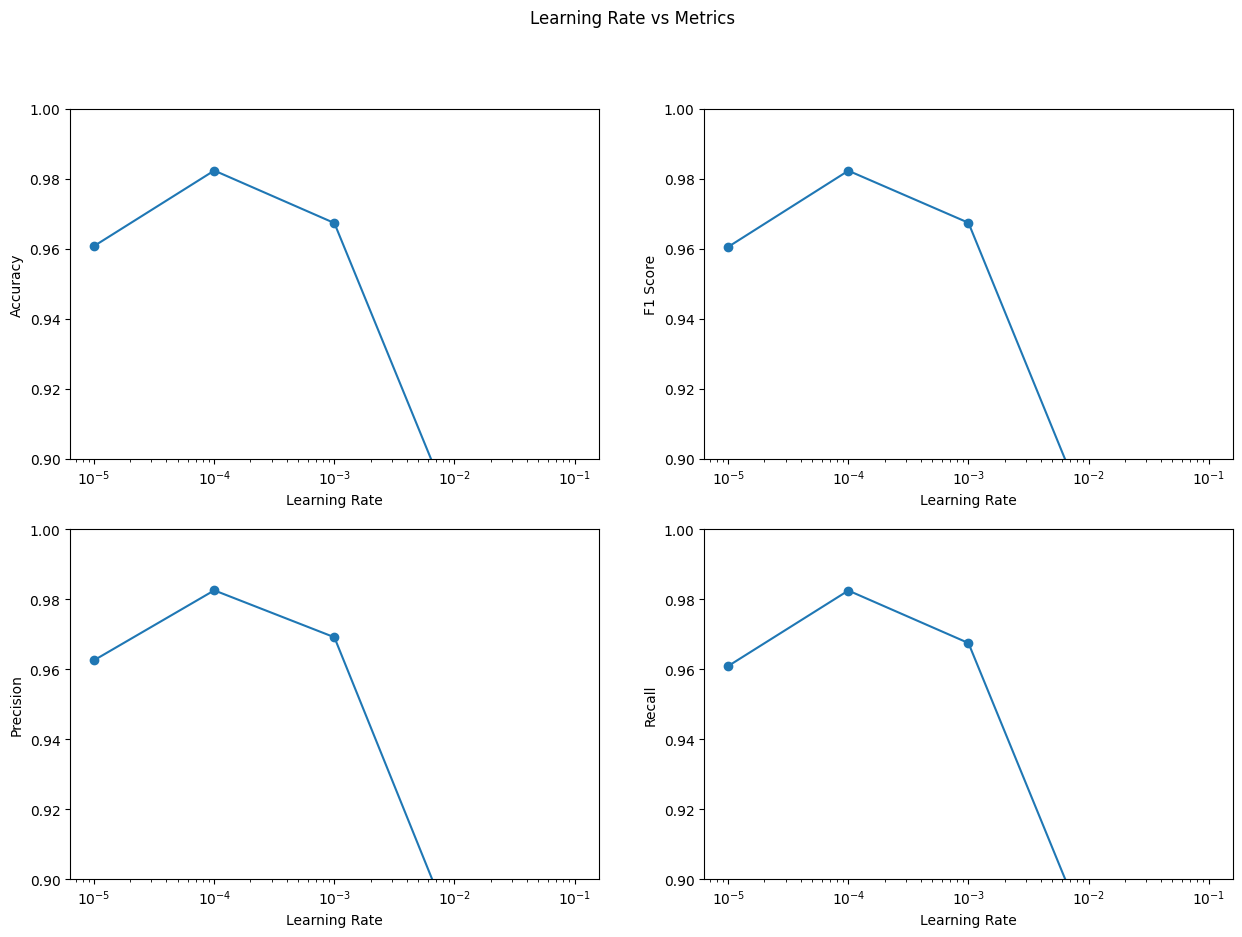

In [21]:
#draw line graphs for learning rate vs acc, f1, prec, recall   
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Learning Rate vs Metrics') 

axs[0,0].plot(lr_df['Learning Rate'], lr_df['Accuracy'], label='Accuracy', marker='o')
axs[0,0].set_xscale('log')
axs[0,0].set_xlabel('Learning Rate')
axs[0,0].set_ylabel('Accuracy')
axs[0,0].set_ylim(0.9, 1)


axs[0,1].plot(lr_df['Learning Rate'], lr_df['F1 Score'], label='F1 Score', marker='o')
axs[0,1].set_xscale('log')
axs[0,1].set_xlabel('Learning Rate')
axs[0,1].set_ylabel('F1 Score')
axs[0,1].set_ylim(0.9, 1)


axs[1,0].plot(lr_df['Learning Rate'], lr_df['Precision'], label='Precision', marker='o')
axs[1,0].set_xscale('log')
axs[1,0].set_xlabel('Learning Rate')
axs[1,0].set_ylabel('Precision')
axs[1,0].set_ylim(0.9, 1)


axs[1,1].plot(lr_df['Learning Rate'], lr_df['Recall'], label='Recall', marker='o')
axs[1,1].set_xscale('log')
axs[1,1].set_xlabel('Learning Rate')
axs[1,1].set_ylabel('Recall')
axs[1,1].set_ylim(0.9, 1)


plt.show()

Clear that 0.0001 is the best learning rate

Model loaded
OPTIMIZER: sgd
  6/625 [..............................] - ETA: 6s - loss: 0.0768 - accuracy: 0.9740  

2024-03-03 18:11:07.676993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 23/625 [>.............................] - ETA: 4s

2024-03-03 18:11:14.766806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 5s 8ms/step
Results: [0.07020875811576843, 0.9810000061988831]
Accuracy: 0.981
F1 Score: 0.9809848120648418
Precision: 0.9809909501979848
Recall: 0.981
Confusion Matrix:
 [[6545  124    6]
 [  94 6522  106]
 [   3   47 6553]]


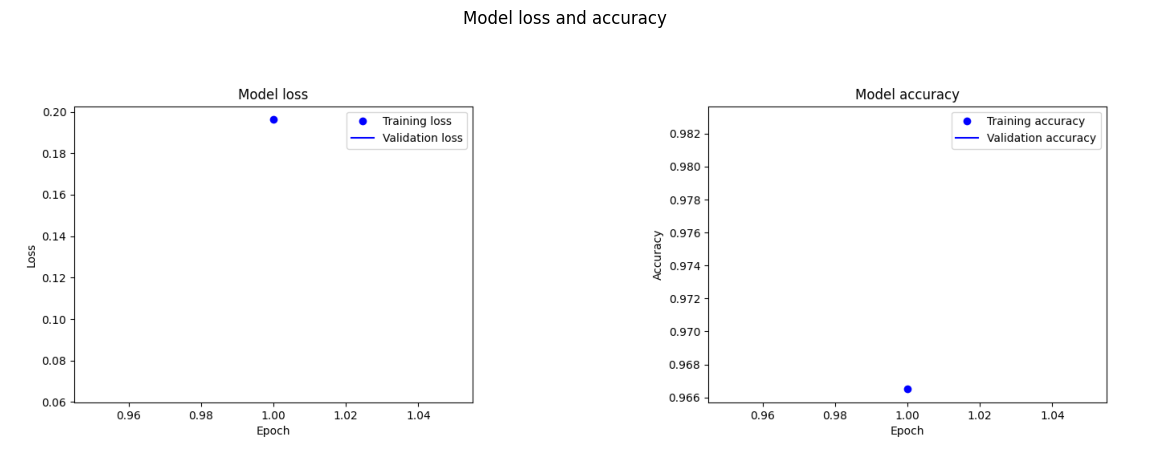

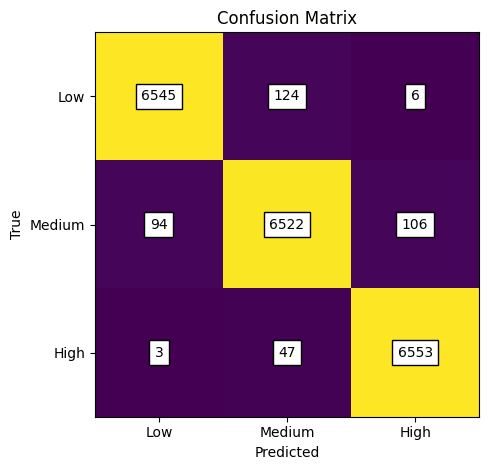

Model loaded
OPTIMIZER: rmsprop


2024-03-03 18:11:21.830581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  9/625 [..............................] - ETA: 10s

2024-03-03 18:11:29.802985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 5s 8ms/step
Results: [0.37493258714675903, 0.9675499796867371]
Accuracy: 0.96755
F1 Score: 0.9676600869968636
Precision: 0.9695250291234244
Recall: 0.96755
Confusion Matrix:
 [[6184  487    4]
 [   8 6655   59]
 [   2   89 6512]]


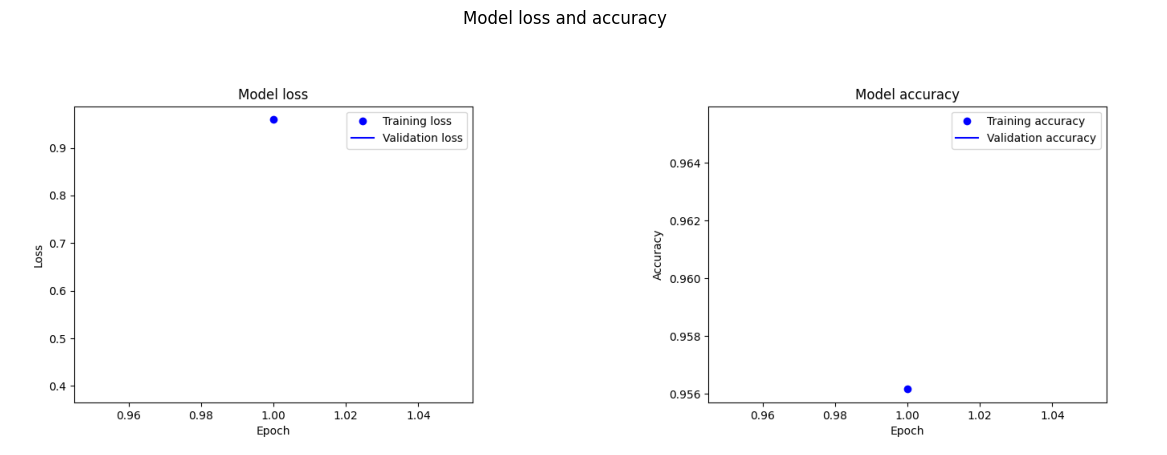

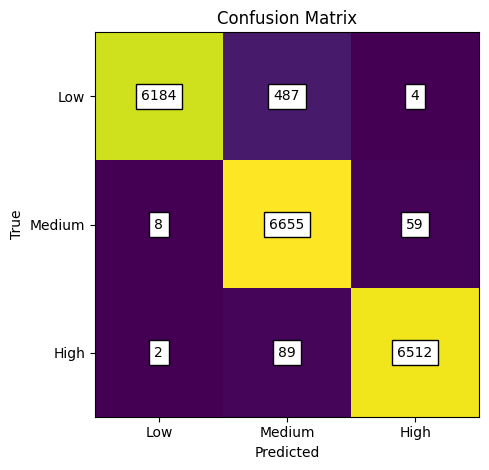

Model loaded
OPTIMIZER: adagrad
  5/625 [..............................] - ETA: 8s - loss: 0.4961 - accuracy: 0.9500  

2024-03-03 18:11:37.745855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 14/625 [..............................] - ETA: 5s

2024-03-03 18:11:46.115668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 6s 9ms/step
Results: [0.3244965970516205, 0.9556999802589417]
Accuracy: 0.9557
F1 Score: 0.9557476707835761
Precision: 0.9558896519085218
Recall: 0.9557
Confusion Matrix:
 [[6368  300    7]
 [ 167 6326  229]
 [   9  174 6420]]


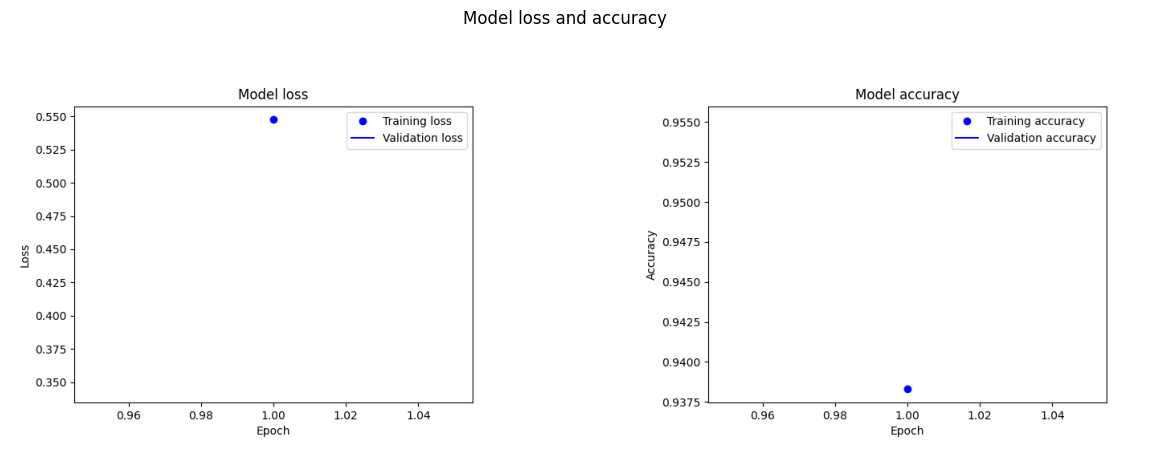

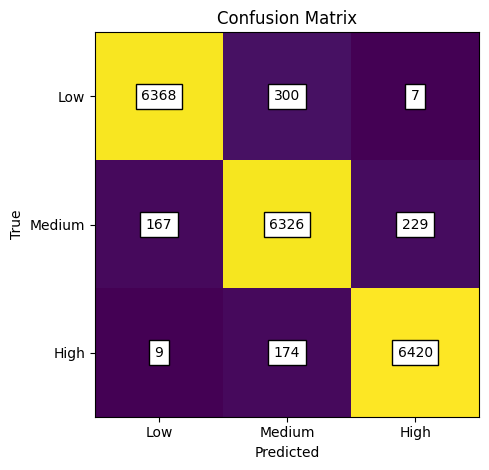

Model loaded
OPTIMIZER: adam


2024-03-03 18:11:53.730862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  6/625 [..............................] - ETA: 14s

2024-03-03 18:12:01.791543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 7s 11ms/step
Results: [0.17939729988574982, 0.9834499955177307]
Accuracy: 0.98345
F1 Score: 0.9835018962696649
Precision: 0.9837599958999846
Recall: 0.98345
Confusion Matrix:
 [[6555  118    2]
 [  41 6657   24]
 [   6  140 6457]]


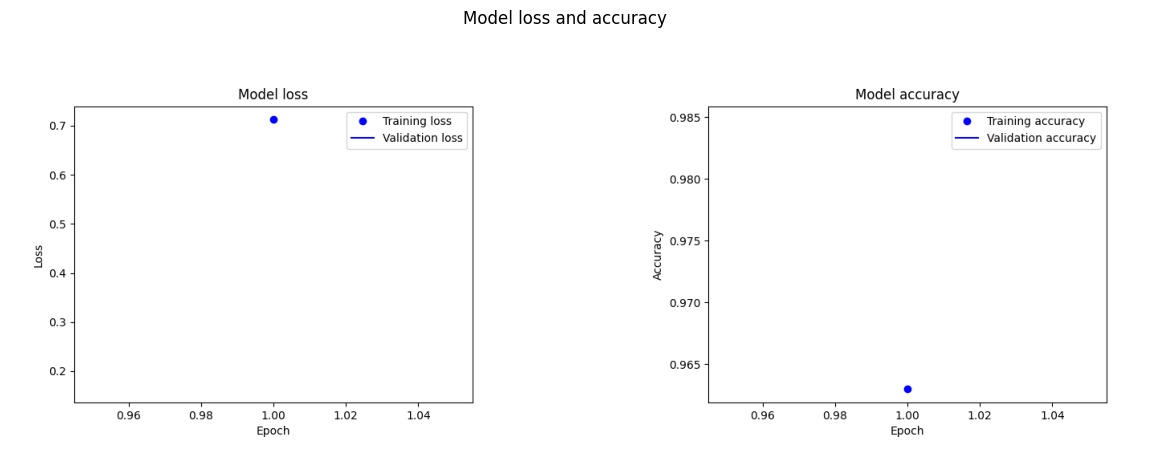

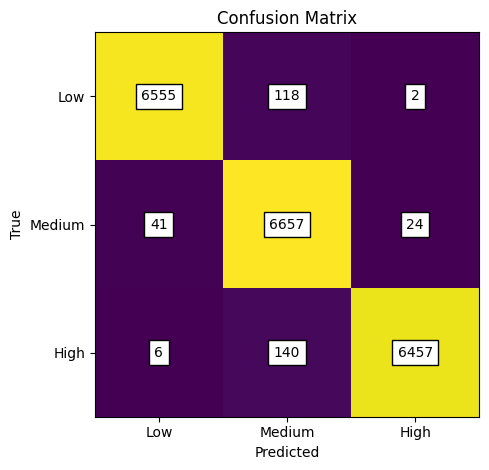

In [22]:
#tuning different optimizers

opt_df = pd.DataFrame(columns=['Optimizers', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
optimizers = {
    'sgd': keras.optimizers.legacy.SGD(learning_rate=0.0001),
    'rmsprop': keras.optimizers.legacy.RMSprop(learning_rate=0.0001),
    'adagrad': keras.optimizers.legacy.Adagrad(learning_rate=0.0001),
    'adam': keras.optimizers.legacy.Adam(learning_rate=0.0001),
}

for name, optimizer in optimizers.items():
    
    #try load already built model
    try:
        model_name = 'modelV1_opt_'+ str(name)
        model = keras.models.load_model('./models/'+model_name+'.h5')
        print('Model loaded')
        modelCreated = True
    except:
        modelCreated = False
        print('Model not found')
        
    print("OPTIMIZER:", name)
    
    if not modelCreated:
        #same model as modelV1, but with different learning rates
        inputs = keras.Input(shape=(160,128,1)) #resolution of images
        x = layers.Conv2D(16, 3, activation="relu")(inputs)
        x = layers.MaxPooling2D(pool_size=2)(x)
        x = layers.Flatten()(x)
        outputs = layers.Dense(3, activation="softmax")(x) #3 classes
        model = keras.Model(inputs=inputs, outputs=outputs)
        
        model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
        model.fit(np.array(X_train), np.array(y_train), epochs=1, batch_size=16, validation_data=(np.array(X_val), np.array(y_val)))
        
        model.save('./models/'+ model_name + '.h5')


    plot_loss_accuracy(modelCreated, model, model_name)
    results = evaluate_model(model, X_test, y_test, model_name)
    results['Optimizers'] = name
    opt_df.loc[len(opt_df.index)] = results

In [23]:
opt_df

Optimizers Accuracy  F1 Score Precision   Recall
0        sgd    0.981  0.980985  0.980991    0.981
1    rmsprop  0.96755   0.96766  0.969525  0.96755
2    adagrad   0.9557  0.955748   0.95589   0.9557
3       adam  0.98345  0.983502   0.98376  0.98345

(0.9, 1.0)

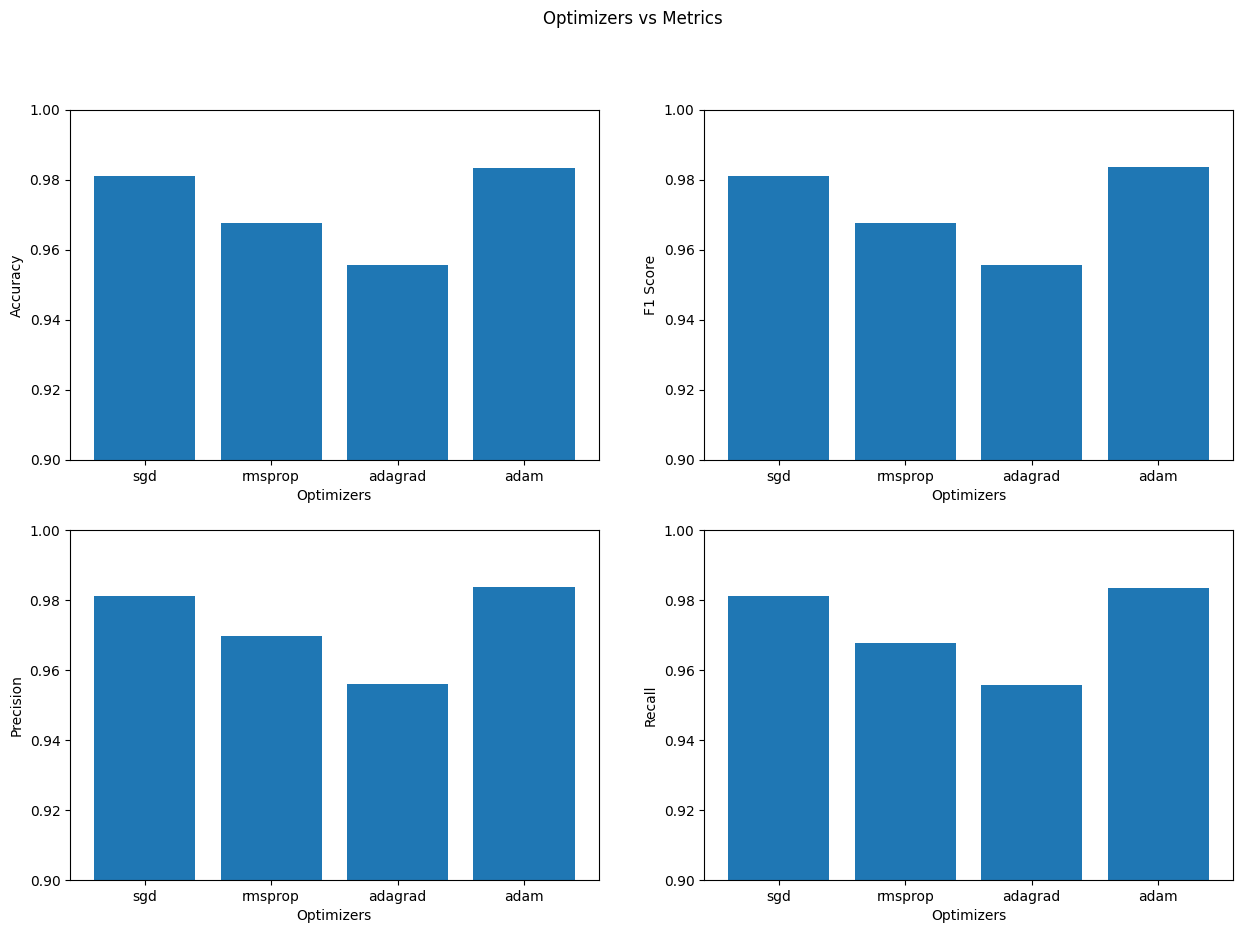

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Optimizers vs Metrics')

axs[0,0].bar(opt_df['Optimizers'], opt_df['Accuracy'], label='Accuracy')
axs[0,0].set_xlabel('Optimizers')
axs[0,0].set_ylabel('Accuracy')
axs[0,0].set_ylim(0.9, 1.0)


axs[0,1].bar(opt_df['Optimizers'], opt_df['F1 Score'], label='F1 Score')
axs[0,1].set_xlabel('Optimizers')
axs[0,1].set_ylabel('F1 Score') 
axs[0,1].set_ylim(0.9, 1.0)


axs[1,0].bar(opt_df['Optimizers'], opt_df['Precision'], label='Precision')
axs[1,0].set_xlabel('Optimizers')
axs[1,0].set_ylabel('Precision')
axs[1,0].set_ylim(0.9, 1.0)


axs[1,1].bar(opt_df['Optimizers'], opt_df['Recall'], label='Recall')
axs[1,1].set_xlabel('Optimizers')
axs[1,1].set_ylabel('Recall')
axs[1,1].set_ylim(0.9, 1.0)



Adam is the best optimizer

Model loaded
Batch Size: 8
  3/625 [..............................] - ETA: 16s - loss: 0.9733 - accuracy: 0.9271 

2024-03-03 18:12:10.640954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  3/625 [..............................] - ETA: 28s 

2024-03-03 18:12:20.743437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 7s 11ms/step
Results: [0.4173380732536316, 0.9544500112533569]
Accuracy: 0.95445
F1 Score: 0.9546448033459637
Precision: 0.9587804952310373
Recall: 0.95445
Confusion Matrix:
 [[6534  141    0]
 [  42 6667   13]
 [  11  704 5888]]


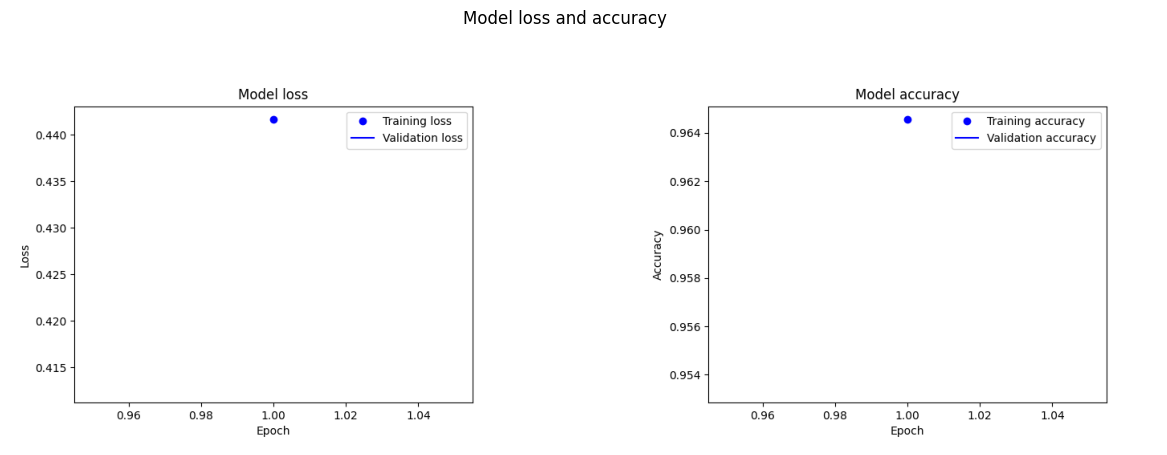

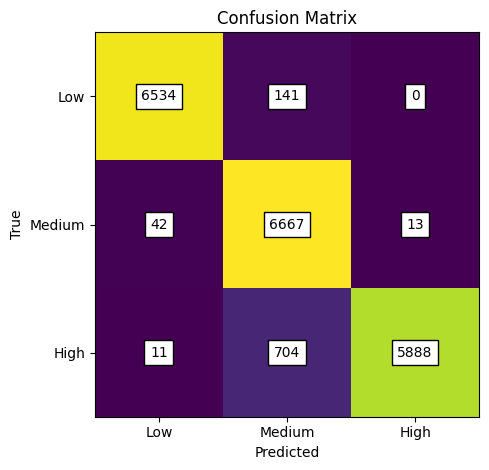

Model loaded
Batch Size: 16


2024-03-03 18:12:30.311034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  6/625 [..............................] - ETA: 7s  

2024-03-03 18:12:46.746385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 8s 13ms/step
Results: [0.24707791209220886, 0.9730499982833862]
Accuracy: 0.97305
F1 Score: 0.9731786857494813
Precision: 0.9740580396408756
Recall: 0.97305
Confusion Matrix:
 [[6360  315    0]
 [  38 6638   46]
 [   9  131 6463]]


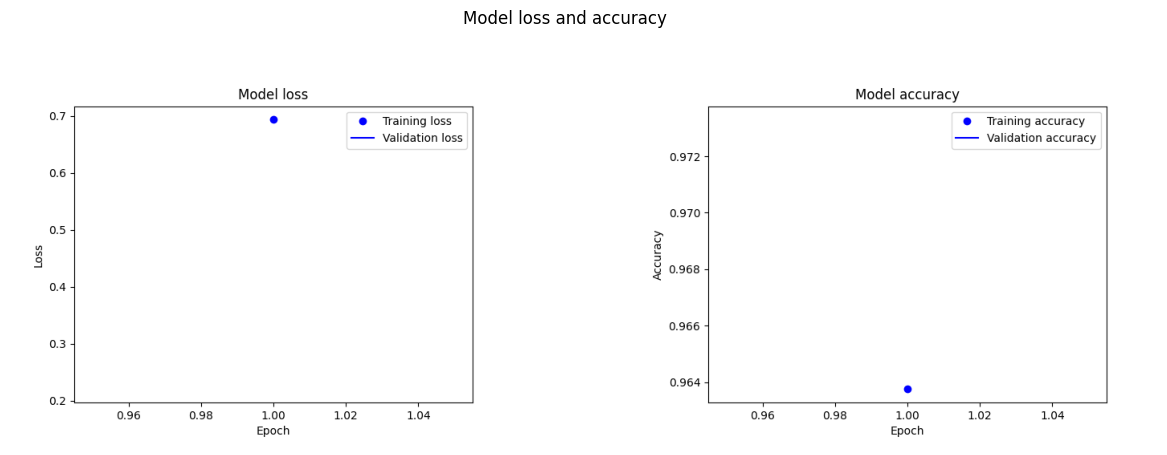

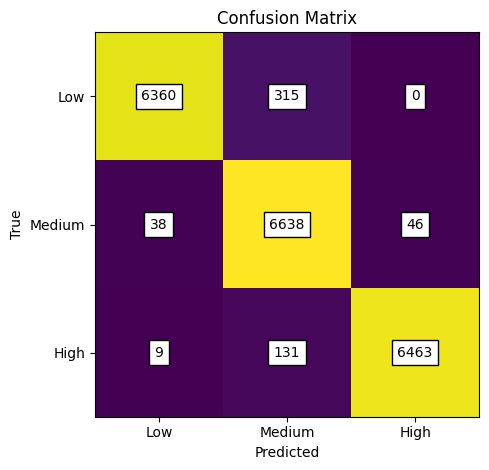

Model loaded
Batch Size: 32


2024-03-03 18:12:56.609466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 15/625 [..............................] - ETA: 4s

2024-03-03 18:13:06.890360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 5s 9ms/step
Results: [0.14678354561328888, 0.9853000044822693]
Accuracy: 0.9853
F1 Score: 0.985323196396591
Precision: 0.9855037273840304
Recall: 0.9853
Confusion Matrix:
 [[6503  170    2]
 [  23 6652   47]
 [   4   48 6551]]


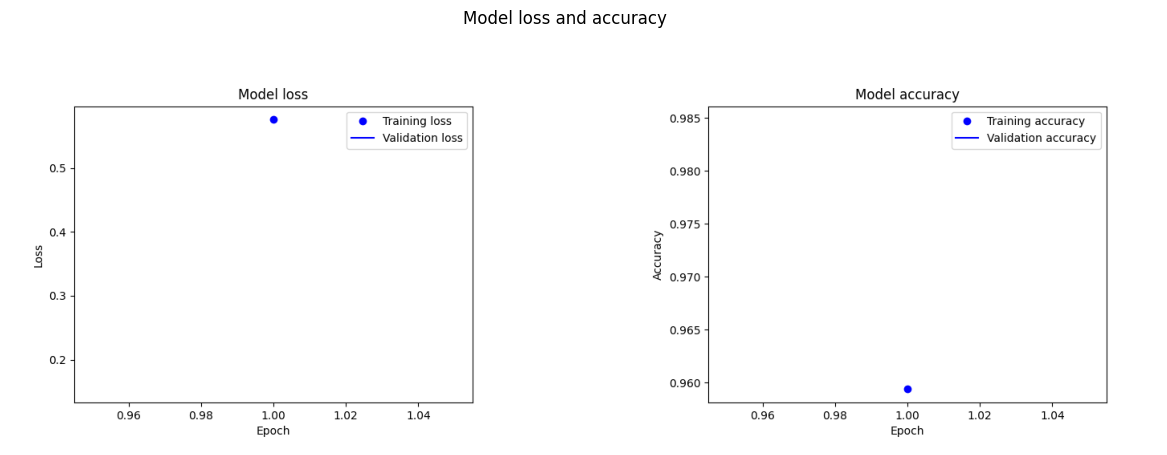

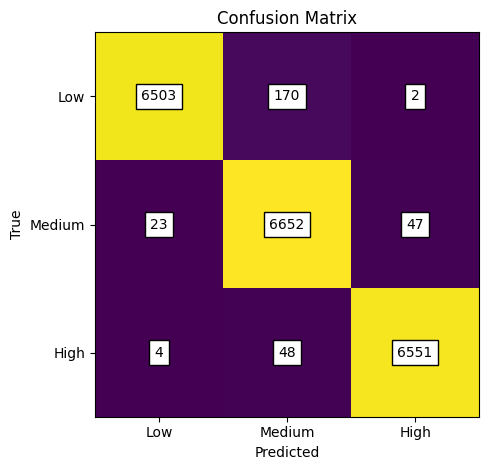

Model loaded
Batch Size: 64


2024-03-03 18:13:14.785529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 21/625 [>.............................] - ETA: 4s

2024-03-03 18:13:23.458896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 5s 7ms/step
Results: [0.47198939323425293, 0.9643499851226807]
Accuracy: 0.96435
F1 Score: 0.9646704601681986
Precision: 0.9668817316365499
Recall: 0.96435
Confusion Matrix:
 [[6271  403    1]
 [  18 6665   39]
 [   2  250 6351]]


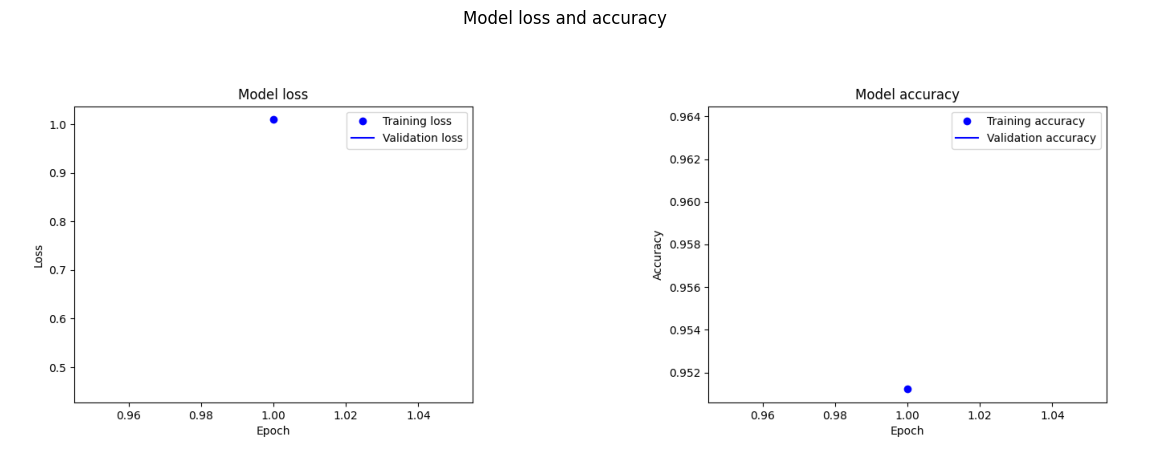

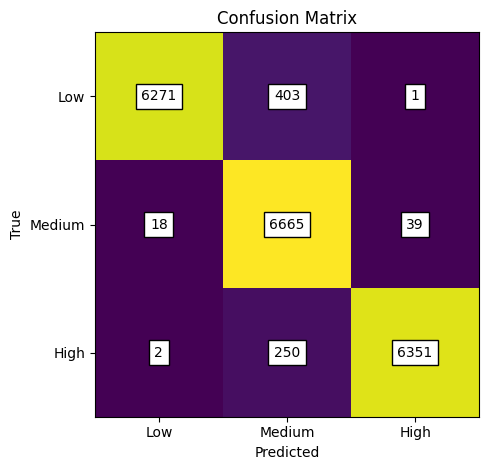

In [25]:
#tuning different optimizers

batch_df = pd.DataFrame(columns=['Batch Size', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
batch_sizes = [8, 16, 32, 64]

for batch_size in batch_sizes:
    
    #try load already built model
    try:
        model_name = 'modelV1_batch_'+ str(batch_size)
        model = keras.models.load_model('./models/'+model_name+'.h5')
        print('Model loaded')
        modelCreated = True
    except:
        modelCreated = False
        print('Model not found')
        
    print("Batch Size:", batch_size)
    
    if not modelCreated:
        #same model as modelV1, but with different learning rates
        inputs = keras.Input(shape=(160,128,1)) #resolution of images
        x = layers.Conv2D(16, 3, activation="relu")(inputs)
        x = layers.MaxPooling2D(pool_size=2)(x)
        x = layers.Flatten()(x)
        outputs = layers.Dense(3, activation="softmax")(x) #3 classes
        model = keras.Model(inputs=inputs, outputs=outputs)
        
        model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=0.0001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
        model.fit(np.array(X_train), np.array(y_train), epochs=1, batch_size=batch_size, validation_data=(np.array(X_val), np.array(y_val)))
        
        model.save('./models/'+ model_name + '.h5')


    plot_loss_accuracy(modelCreated, model, model_name)
    results = evaluate_model(model, X_test, y_test, model_name)
    results['Batch Size'] = batch_size
    batch_df.loc[len(batch_df.index)] = results

(0.9, 1.0)

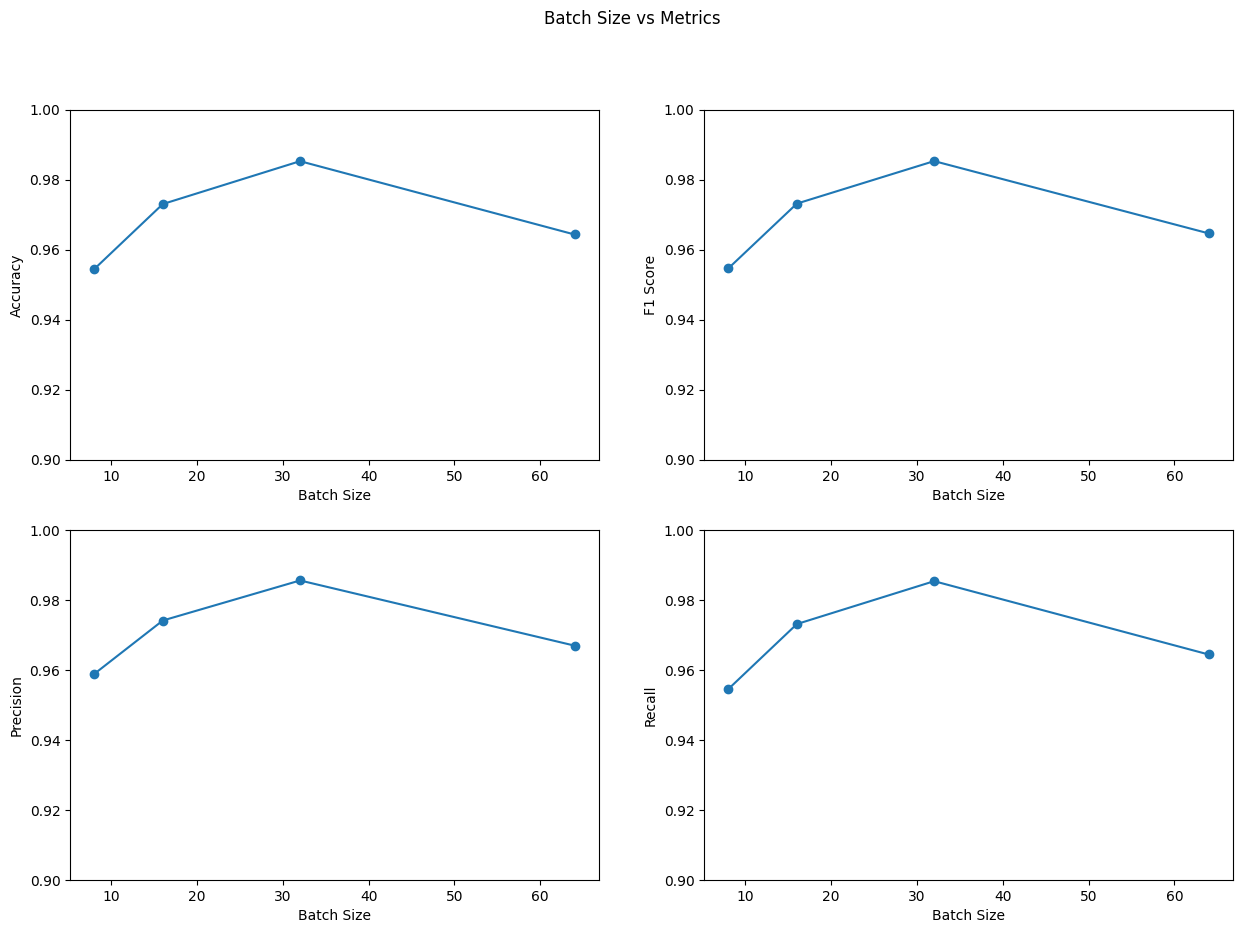

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Batch Size vs Metrics')

axs[0,0].plot(batch_df['Batch Size'], batch_df['Accuracy'], label='Accuracy', marker='o')
axs[0,0].set_xlabel('Batch Size')
axs[0,0].set_ylabel('Accuracy')
axs[0,0].set_ylim(0.9, 1.0)

axs[0,1].plot(batch_df['Batch Size'], batch_df['F1 Score'], label='F1 Score', marker='o')
axs[0,1].set_xlabel('Batch Size')
axs[0,1].set_ylabel('F1 Score')
axs[0,1].set_ylim(0.9, 1.0)

axs[1,0].plot(batch_df['Batch Size'], batch_df['Precision'], label='Precision', marker='o')
axs[1,0].set_xlabel('Batch Size')
axs[1,0].set_ylabel('Precision')
axs[1,0].set_ylim(0.9, 1.0)

axs[1,1].plot(batch_df['Batch Size'], batch_df['Recall'], label='Recall', marker='o')
axs[1,1].set_xlabel('Batch Size')
axs[1,1].set_ylabel('Recall')
axs[1,1].set_ylim(0.9, 1.0)

32 is the best batch size

Model loaded
Epochs: 1
  6/625 [..............................] - ETA: 6s - loss: 0.3647 - accuracy: 0.9844  

2024-03-03 18:13:30.886547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 23/625 [>.............................] - ETA: 4s

2024-03-03 18:13:39.790837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 5s 7ms/step
Results: [0.2898976802825928, 0.9790999889373779]
Accuracy: 0.9791
F1 Score: 0.9791914141384966
Precision: 0.979720156505092
Recall: 0.9791
Confusion Matrix:
 [[6540  132    3]
 [  35 6656   31]
 [   2  215 6386]]


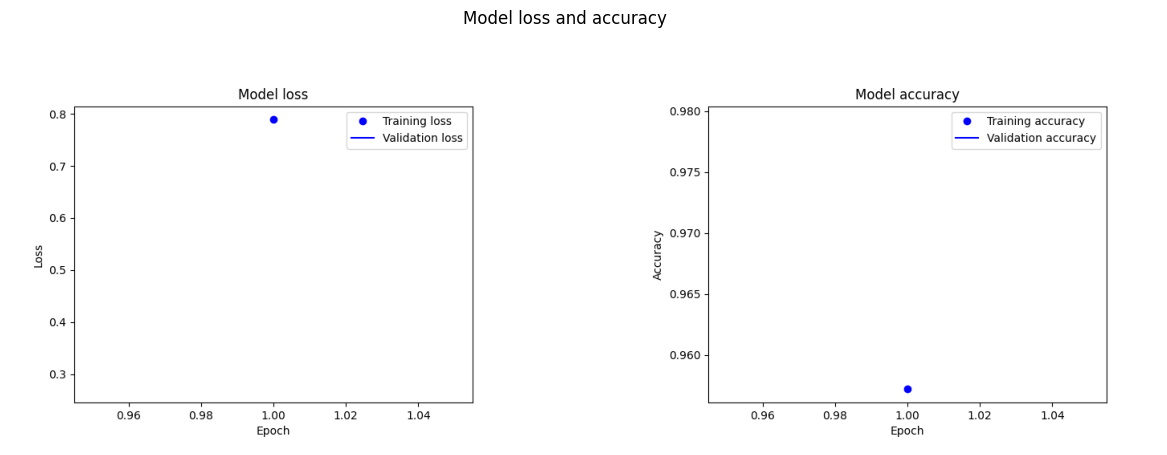

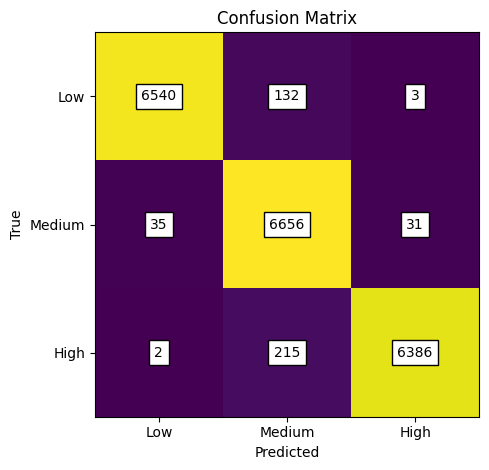

Model loaded
Epochs: 5
  6/625 [..............................] - ETA: 7s - loss: 0.3617 - accuracy: 0.9740  

2024-03-03 18:13:46.140667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  9/625 [..............................] - ETA: 10s

2024-03-03 18:13:54.265499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 6s 10ms/step
Results: [0.10703562200069427, 0.9916999936103821]
Accuracy: 0.9917
F1 Score: 0.991695817317054
Precision: 0.9916963936614269
Recall: 0.9917
Confusion Matrix:
 [[6635   40    0]
 [  57 6625   40]
 [   1   28 6574]]


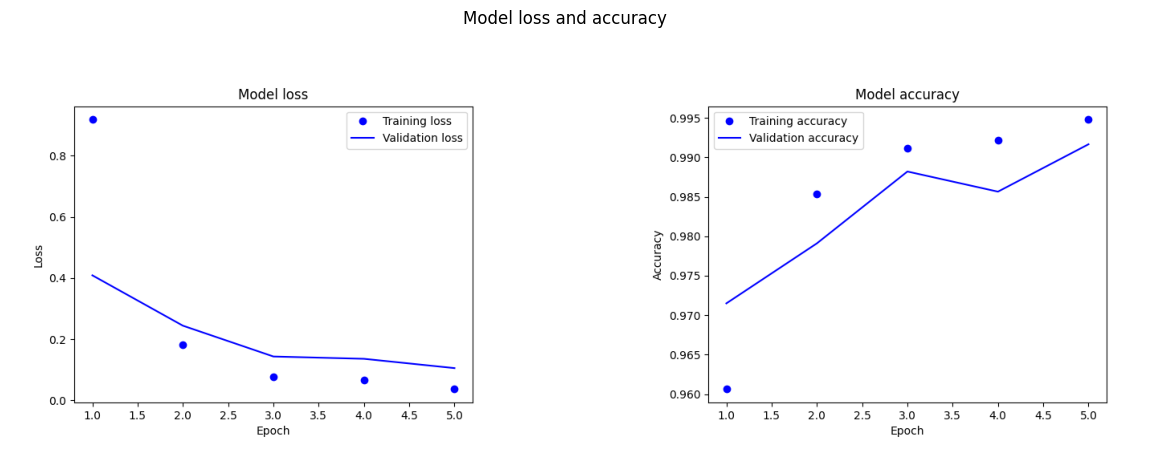

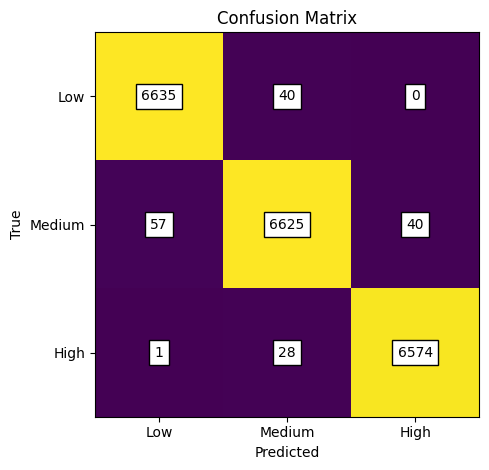

Model loaded
Epochs: 10
  4/625 [..............................] - ETA: 10s - loss: 0.7481 - accuracy: 0.9688 

2024-03-03 18:14:01.915800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  1/625 [..............................] - ETA: 2:38

2024-03-03 18:14:12.144460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 8s 12ms/step
Results: [0.15249274671077728, 0.989300012588501]
Accuracy: 0.9893
F1 Score: 0.989327641811542
Precision: 0.9894780424642031
Recall: 0.9893
Confusion Matrix:
 [[6573  101    1]
 [  14 6690   18]
 [   0   80 6523]]


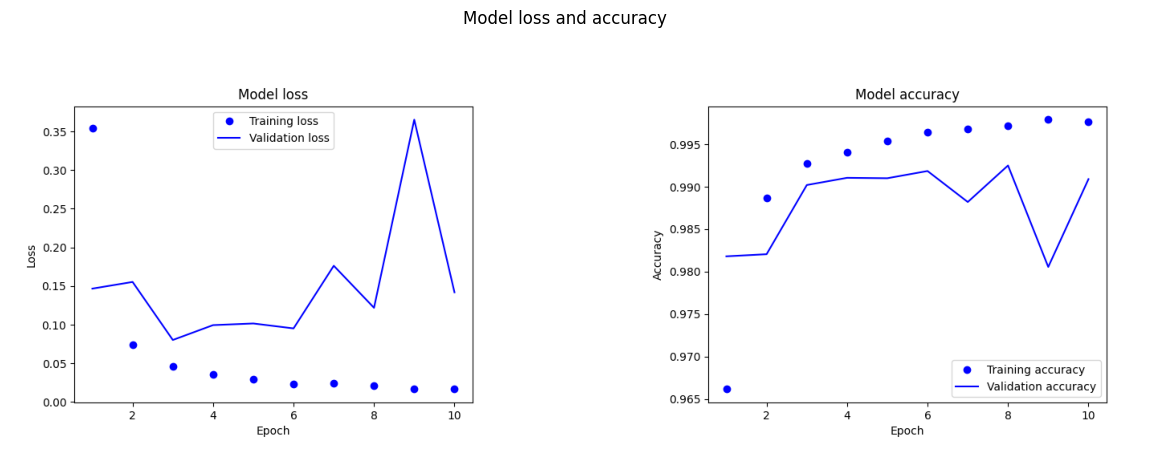

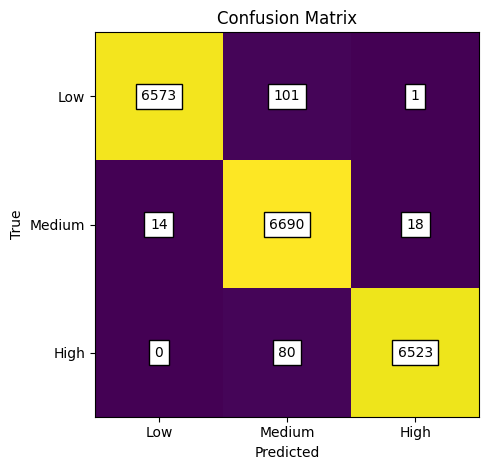

Model loaded
Epochs: 20


2024-03-03 18:14:21.969614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  4/625 [..............................] - ETA: 11s 

2024-03-03 18:14:32.462518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 7s 11ms/step
Results: [0.13652931153774261, 0.9914000034332275]
Accuracy: 0.9914
F1 Score: 0.991394451725914
Precision: 0.9913957017914836
Recall: 0.9914
Confusion Matrix:
 [[6630   44    1]
 [  54 6620   48]
 [   1   24 6578]]


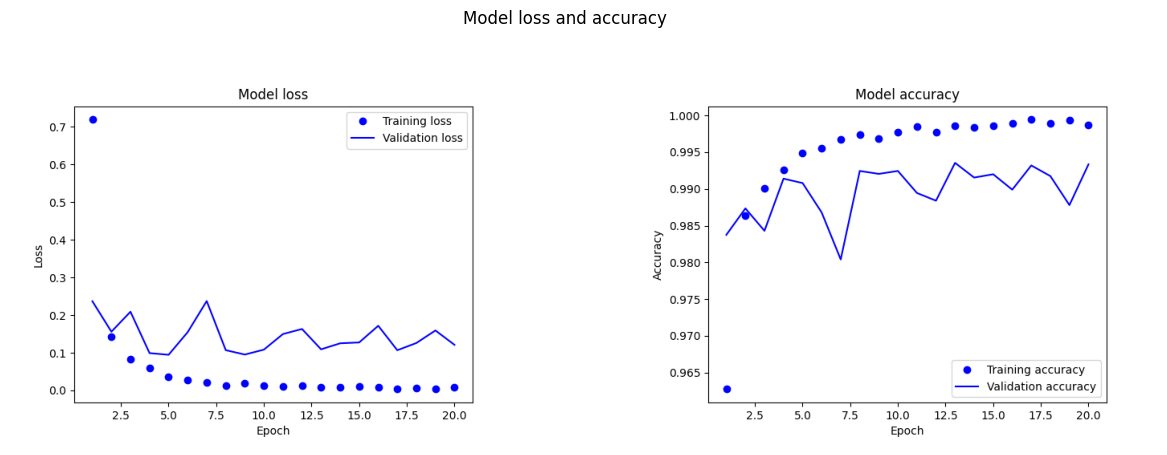

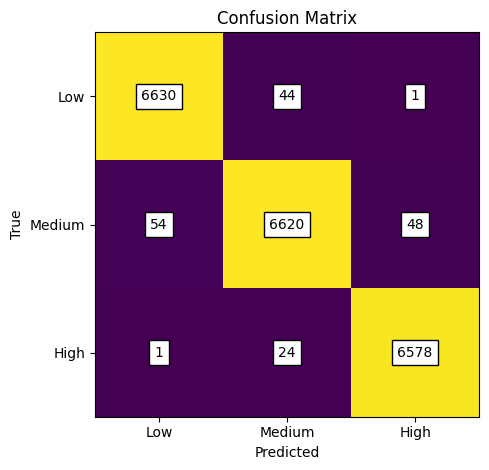

In [27]:
#tuning different optimizers

epoch_df = pd.DataFrame(columns=['Epochs', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
epochs = [1, 5, 10, 20]

for epoch in epochs:
    
    #try load already built model
    try:
        model_name = 'modelV1_epoch_'+ str(epoch)
        model = keras.models.load_model('./models/'+model_name+'.h5')
        print('Model loaded')
        modelCreated = True
    except:
        modelCreated = False
        print('Model not found')
        
    print("Epochs:", epoch)
    
    if not modelCreated:
        #same model as modelV1, but with different learning rates
        inputs = keras.Input(shape=(160,128,1)) #resolution of images
        x = layers.Conv2D(16, 3, activation="relu")(inputs)
        x = layers.MaxPooling2D(pool_size=2)(x)
        x = layers.Flatten()(x)
        outputs = layers.Dense(3, activation="softmax")(x) #3 classes
        model = keras.Model(inputs=inputs, outputs=outputs)
        
        model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=0.0001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
        model.fit(np.array(X_train), np.array(y_train), epochs=epoch, batch_size=32, validation_data=(np.array(X_val), np.array(y_val)))
        
        model.save('./models/'+ model_name + '.h5')


    plot_loss_accuracy(modelCreated, model, model_name)
    results = evaluate_model(model, X_test, y_test, model_name)
    results['Epochs'] = epoch
    epoch_df.loc[len(epoch_df.index)] = results

(0.95, 1.0)

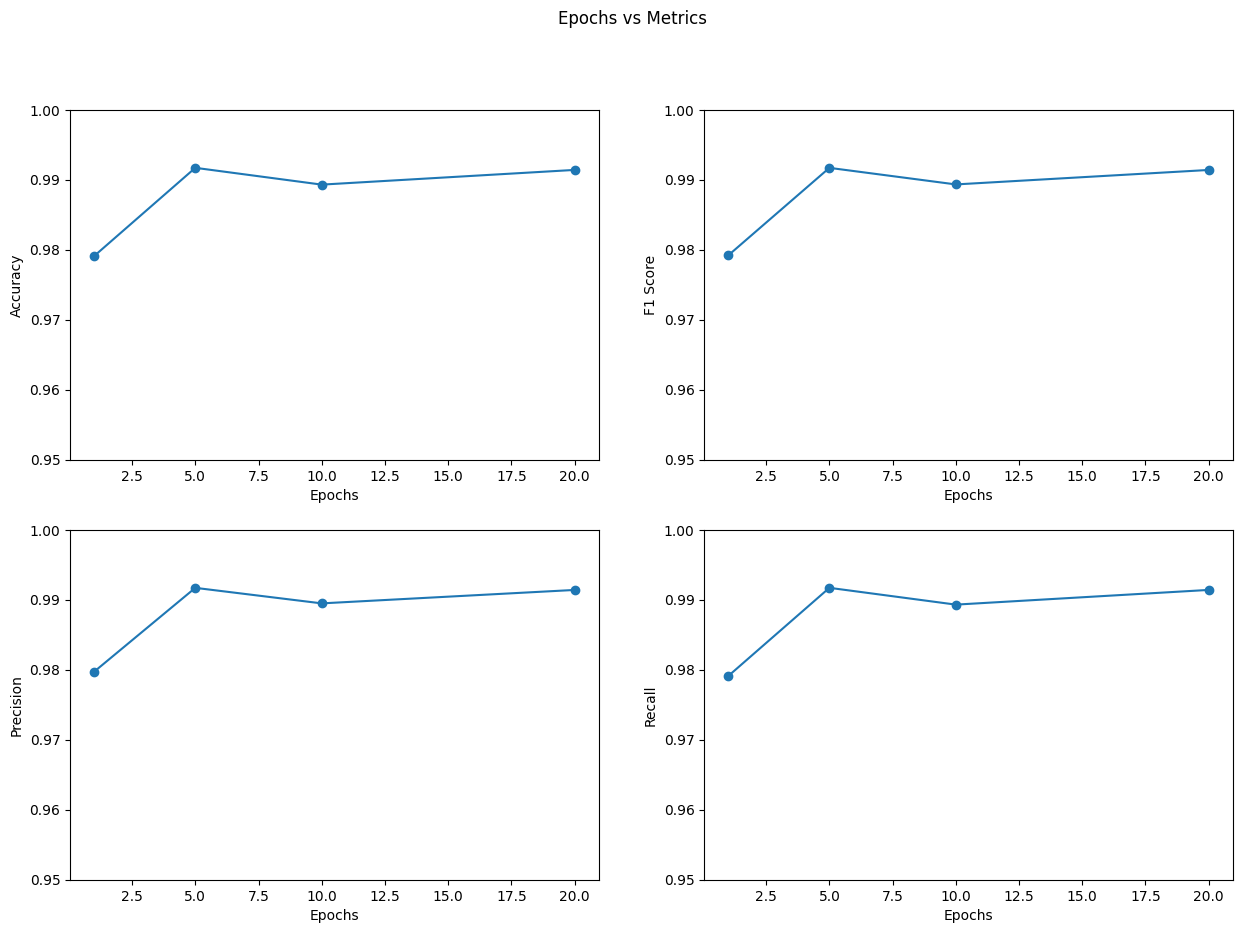

In [28]:
#plot line graphs for epochs vs acc, f1, prec, recall
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Epochs vs Metrics')

axs[0,0].plot(epoch_df['Epochs'], epoch_df['Accuracy'], label='Accuracy', marker='o')
axs[0,0].set_xlabel('Epochs')
axs[0,0].set_ylabel('Accuracy')
axs[0,0].set_ylim(0.95, 1.0)

axs[0,1].plot(epoch_df['Epochs'], epoch_df['F1 Score'], label='F1 Score', marker='o')
axs[0,1].set_xlabel('Epochs')
axs[0,1].set_ylabel('F1 Score')
axs[0,1].set_ylim(0.95, 1.0)

axs[1,0].plot(epoch_df['Epochs'], epoch_df['Precision'], label='Precision', marker='o')
axs[1,0].set_xlabel('Epochs')
axs[1,0].set_ylabel('Precision')
axs[1,0].set_ylim(0.95, 1.0)

axs[1,1].plot(epoch_df['Epochs'], epoch_df['Recall'], label='Recall', marker='o')
axs[1,1].set_xlabel('Epochs')
axs[1,1].set_ylabel('Recall')
axs[1,1].set_ylim(0.95, 1.0)

5 epochs seems best since the model starts to overfit after that.

Model loaded
Layer Config: 1 Conv Layers, 1 Dense Layers
  4/625 [..............................] - ETA: 11s - loss: 0.2836 - accuracy: 0.9844 

2024-03-03 18:14:41.543000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  1/625 [..............................] - ETA: 2:33

2024-03-03 18:14:51.817286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 7s 11ms/step
Results: [0.13368579745292664, 0.9901000261306763]
Accuracy: 0.9901
F1 Score: 0.990102876024772
Precision: 0.9901181059577124
Recall: 0.9901
Confusion Matrix:
 [[6597   74    4]
 [  30 6637   55]
 [   1   34 6568]]


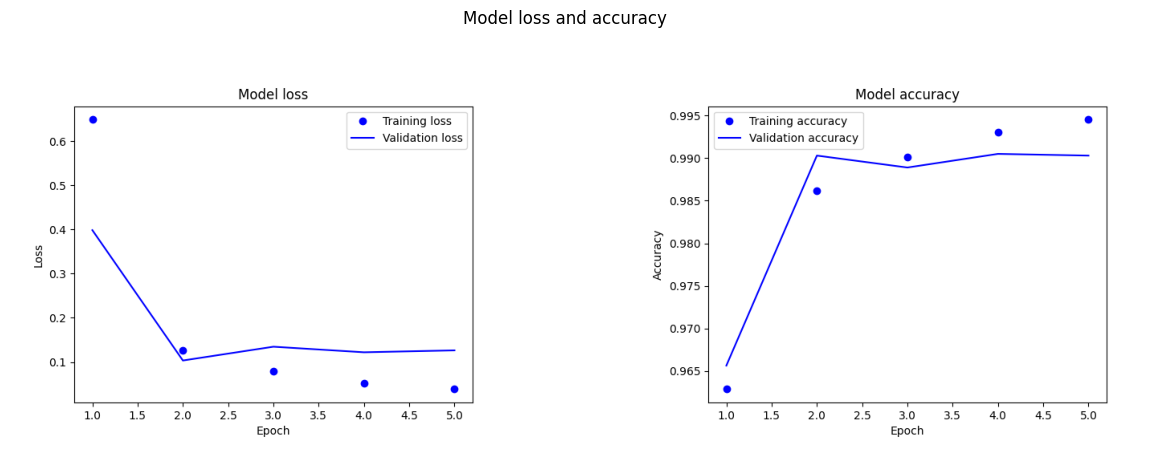

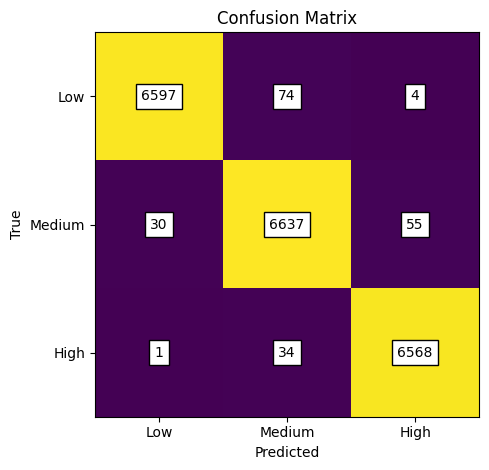

Model loaded
Layer Config: 2 Conv Layers, 1 Dense Layers


2024-03-03 18:15:00.716793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  6/625 [..............................] - ETA: 16s

2024-03-03 18:15:12.337887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 9s 14ms/step
Results: [0.04540864750742912, 0.9865000247955322]
Accuracy: 0.9865
F1 Score: 0.9865218572670048
Precision: 0.9866492730488097
Recall: 0.9865
Confusion Matrix:
 [[6617   57    1]
 [  47 6651   24]
 [   4  137 6462]]


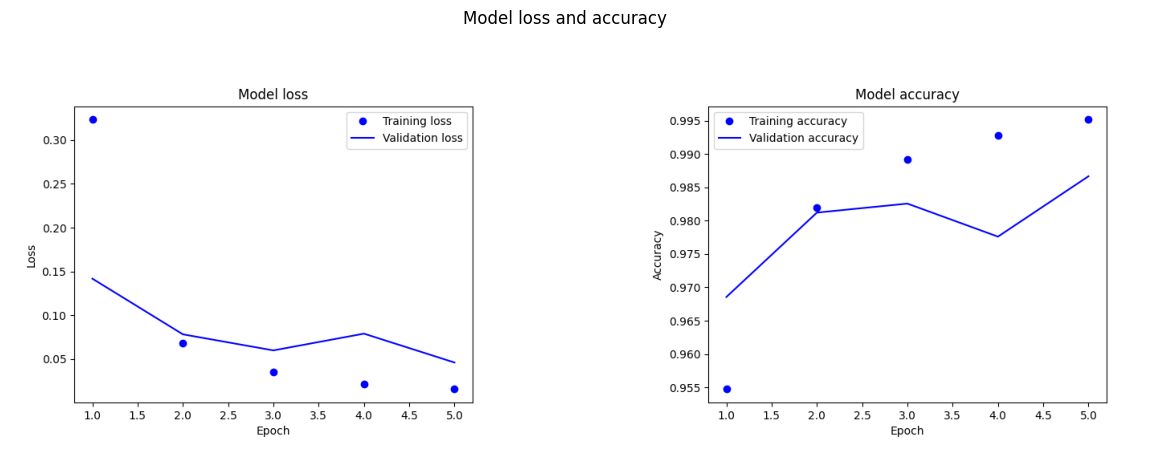

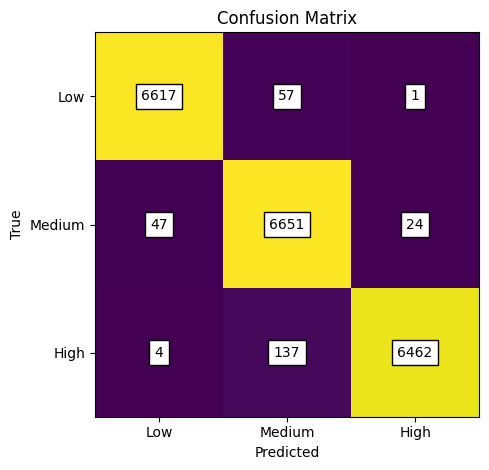

Model loaded
Layer Config: 1 Conv Layers, 2 Dense Layers


2024-03-03 18:15:22.896378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  5/625 [..............................] - ETA: 21s

2024-03-03 18:15:35.152461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 9s 15ms/step
Results: [0.2576688230037689, 0.988099992275238]
Accuracy: 0.9881
F1 Score: 0.9880808208654004
Precision: 0.9882041063899354
Recall: 0.9881
Confusion Matrix:
 [[6660   15    0]
 [ 145 6535   42]
 [   6   30 6567]]


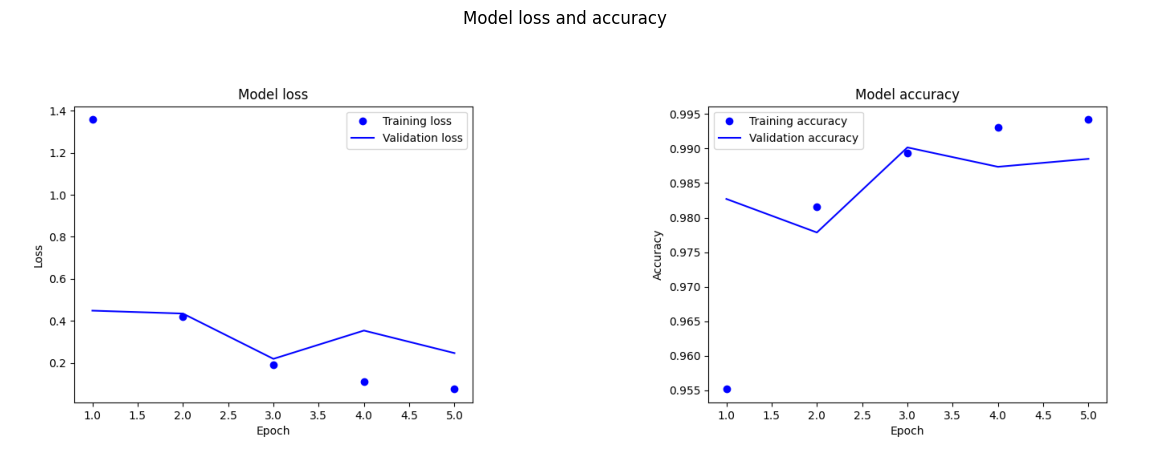

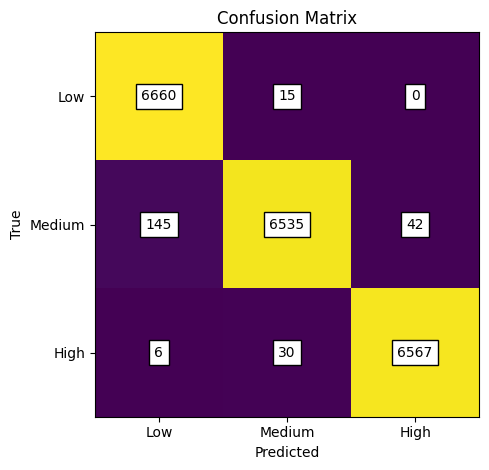

Model loaded
Layer Config: 2 Conv Layers, 2 Dense Layers
  5/625 [..............................] - ETA: 8s - loss: 0.1588 - accuracy: 0.9750  

2024-03-03 18:15:47.081388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  6/625 [..............................] - ETA: 15s

2024-03-03 18:15:56.653524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 6s 10ms/step
Results: [0.1443140059709549, 0.9879500269889832]
Accuracy: 0.98795
F1 Score: 0.9879628216502099
Precision: 0.9880058514204385
Recall: 0.98795
Confusion Matrix:
 [[6578   94    3]
 [  35 6636   51]
 [   0   58 6545]]


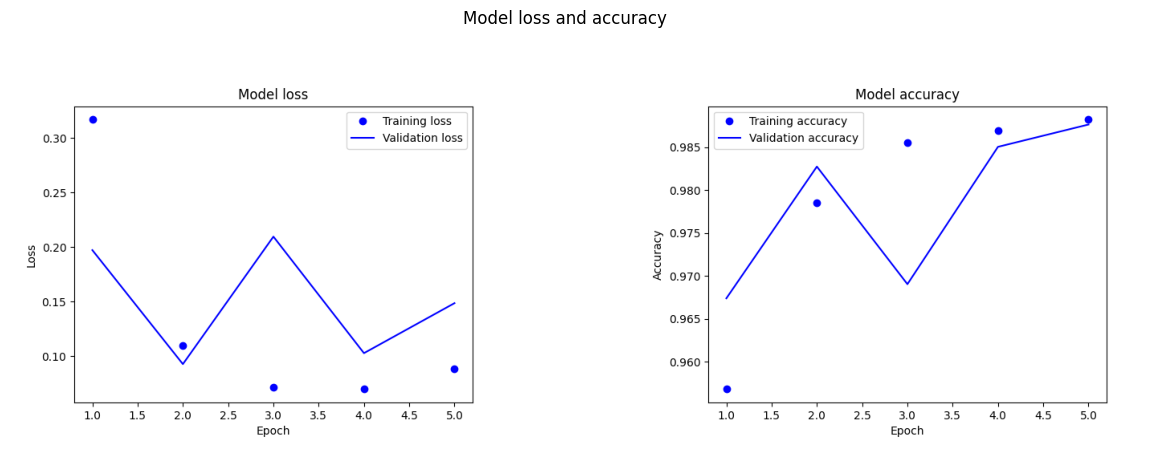

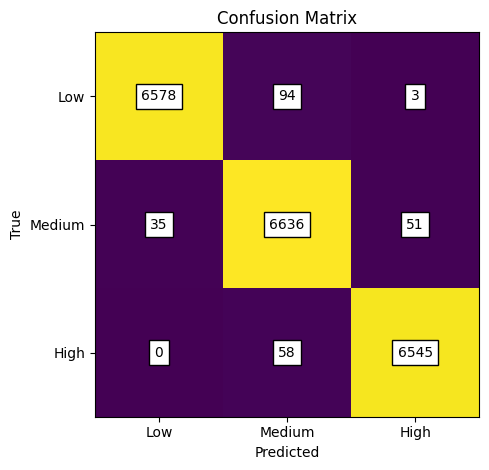

In [29]:
#tuning for best amount of layers
layers_df = pd.DataFrame(columns=['Layer Config', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
layers_to_test = [
    {'conv_layers': 1, 'dense_layers': 1},
    {'conv_layers': 2, 'dense_layers': 1},
    {'conv_layers': 1, 'dense_layers': 2},
    {'conv_layers': 2, 'dense_layers': 2},  
]

for layer_config in layers_to_test:
    num_conv_layers = layer_config['conv_layers']
    num_dense_layers = layer_config['dense_layers']
    
    layer_config_name = str(num_conv_layers) + ' Conv Layers, ' + str(num_dense_layers) + ' Dense Layers'
    #try load already built model
    try:
        model_name = 'modelV1_'+str(num_conv_layers)+'conv_'+ str(num_dense_layers)+'dense'
        model = keras.models.load_model('./models/'+model_name+'.h5')
        print('Model loaded')
        modelCreated = True
    except:
        modelCreated = False
        print('Model not found')
        
    print("Layer Config:", layer_config_name)
    
    if not modelCreated:
        #same model as modelV1, but with different learning rates
        inputs = keras.Input(shape=(160,128,1)) #resolution of images
        x = inputs
        
        #add the convolutional layers
        for _ in range(num_conv_layers):
            x = layers.Conv2D(16, 3, activation="relu")(x)
            x = layers.MaxPooling2D(pool_size=2)(x)
            
        x = layers.Flatten()(x)
        
        #add the dense layers
        for _ in range(num_dense_layers - 1):  #subtract 1 since we already have a dense layer as the output
            x = layers.Dense(32, activation="relu")(x)
            
        outputs = layers.Dense(3, activation="softmax")(x) #3 classes
        model = keras.Model(inputs=inputs, outputs=outputs)
        
        model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=0.0001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
        model.fit(np.array(X_train), np.array(y_train), epochs=5, batch_size=32, validation_data=(np.array(X_val), np.array(y_val)))
        
        model.save('./models/'+ model_name + '.h5')


    plot_loss_accuracy(modelCreated, model, model_name)
    results = evaluate_model(model, X_test, y_test, model_name)
    layer_config_name = str(num_conv_layers) + 'CL ' + str(num_dense_layers) + 'DL'
    results['Layer Config'] = layer_config_name
    layers_df.loc[len(layers_df.index)] = results

(0.98, 1.0)

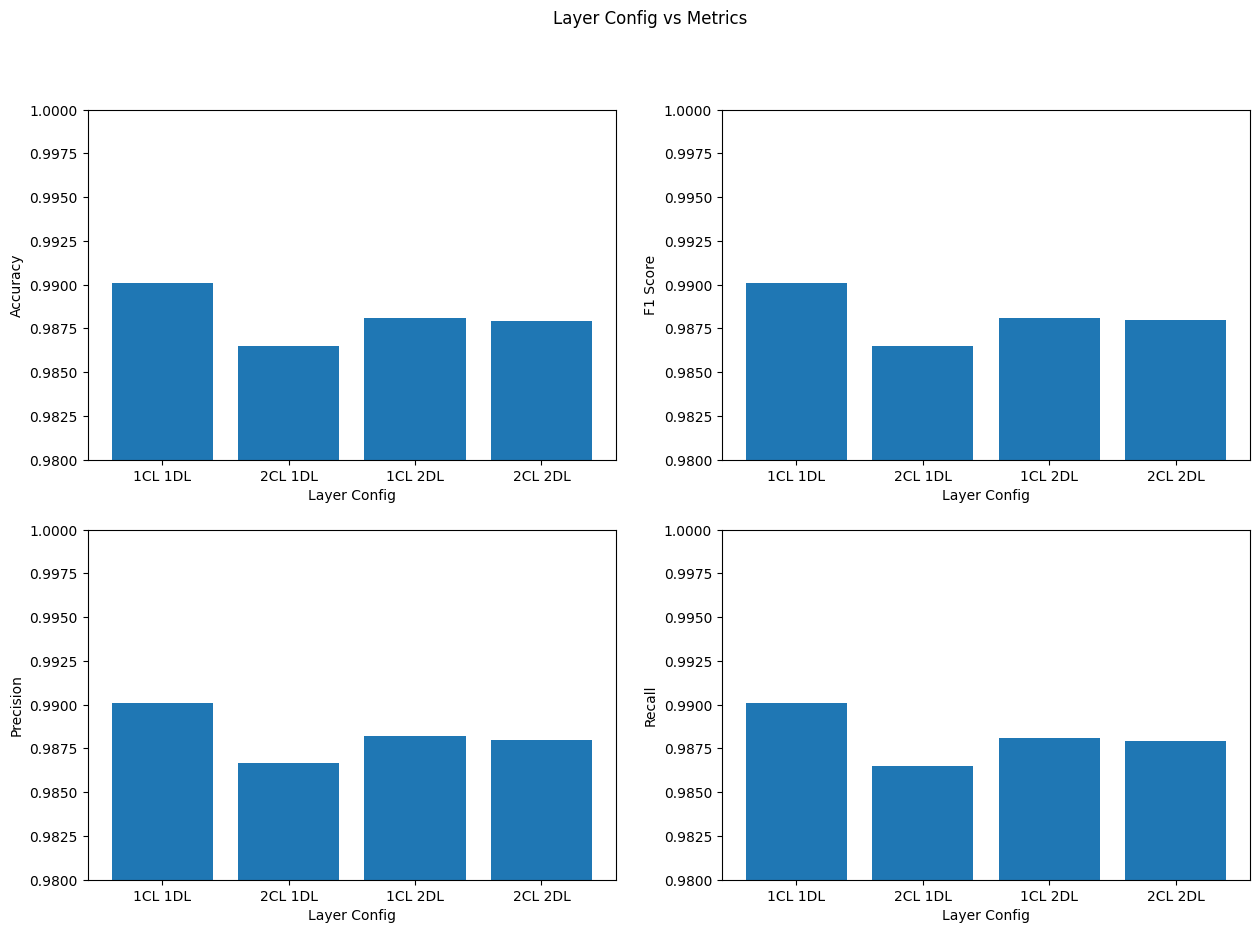

In [30]:
#plot bar graphs for layer config vs acc, f1, prec, recall
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Layer Config vs Metrics')

axs[0,0].bar(layers_df['Layer Config'], layers_df['Accuracy'], label='Accuracy')
axs[0,0].set_xlabel('Layer Config')
axs[0,0].set_ylabel('Accuracy')
axs[0,0].set_ylim(0.98, 1.0)

axs[0,1].bar(layers_df['Layer Config'], layers_df['F1 Score'], label='F1 Score')
axs[0,1].set_xlabel('Layer Config')
axs[0,1].set_ylabel('F1 Score')
axs[0,1].set_ylim(0.98, 1.0)

axs[1,0].bar(layers_df['Layer Config'], layers_df['Precision'], label='Precision')
axs[1,0].set_xlabel('Layer Config')
axs[1,0].set_ylabel('Precision')
axs[1,0].set_ylim(0.98, 1.0)

axs[1,1].bar(layers_df['Layer Config'], layers_df['Recall'], label='Recall')
axs[1,1].set_xlabel('Layer Config')
axs[1,1].set_ylabel('Recall')
axs[1,1].set_ylim(0.98, 1.0)


1 Convolutional Layer and 1 Dense Layer seems to be the best model

In [31]:
#save the 1c1d as the best model if it doesn't exist
if not os.path.exists('./models/best_model.h5'):
    best_model = keras.models.load_model('./models/modelV1_1conv_1dense.h5')
    best_model.save('./models/best_model.h5')
else:
    best_model = keras.models.load_model('./models/best_model.h5')

Lastly try VGG Model for comparison against our best model

In [32]:
#VGG Only takes rgb images and images of size 224x224, so we need to load the images again in colour and resize them.
images_rgb = []
num_required_images = 99999
processed_folder = './data/processed/'
for i in range(num_required_images):
    print("Loading image", i)
    img = Image.open(os.path.join(processed_folder, 'sample_' + str(i) + '.png'))
    img = img.convert('RGB')
    #resize the image to 224x224 because VGG16 only takes that size
    img = img.resize((224, 224))
    img_array = np.array(img)
    images_rgb.append(img_array)

Loading image 0
Loading image 1
Loading image 2
Loading image 3
Loading image 4
Loading image 5
Loading image 6
Loading image 7
Loading image 8
Loading image 9
Loading image 10
Loading image 11
Loading image 12
Loading image 13
Loading image 14
Loading image 15
Loading image 16
Loading image 17
Loading image 18
Loading image 19
Loading image 20
Loading image 21
Loading image 22
Loading image 23
Loading image 24
Loading image 25
Loading image 26
Loading image 27
Loading image 28
Loading image 29
Loading image 30
Loading image 31
Loading image 32
Loading image 33
Loading image 34
Loading image 35
Loading image 36
Loading image 37
Loading image 38
Loading image 39
Loading image 40
Loading image 41
Loading image 42
Loading image 43
Loading image 44
Loading image 45
Loading image 46
Loading image 47
Loading image 48
Loading image 49
Loading image 50
Loading image 51
Loading image 52
Loading image 53
Loading image 54
Loading image 55
Loading image 56
Loading image 57
Loading image 58
Loading

In [33]:
#only use 10000 images for VGG16 due to memory issues so split the data again
throw_away_x, X_reduced, throw_away_y, y_reduced = train_test_split(images_rgb, labels, test_size=0.1, random_state=42)

del throw_away_x
del throw_away_y
del images_rgb
#now split the data into 80% train, 20% test
X_train_temp_vgg, X_test_vgg, y_train_temp_vgg, y_test_vgg = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

#further split the training data into 75% train, 25% validation
X_train_vgg, X_val_vgg, y_train_vgg, y_val_vgg = train_test_split(X_train_temp_vgg, y_train_temp_vgg, test_size=0.25, random_state=42)

del X_train_temp_vgg
del y_train_temp_vgg


In [34]:
#first check if the model exists
try:
    modelVGG = keras.models.load_model('./models/modelVGG16.h5')
    print('Model loaded')
    modelVGGCreated = True
except:
    modelVGGCreated = False
    print('Model not found')

Model loaded


In [35]:
if not modelVGGCreated:
    from keras.applications import VGG16

    #load pre-trained VGG16 model
    vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layer in vgg16.layers:
        layer.trainable = False

    #add custom layers
    x = layers.Flatten()(vgg16.output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    predictions = layers.Dense(3, activation='softmax')(x)

    modelVGG = keras.Model(vgg16.input, predictions)

In [36]:
if not modelVGGCreated:
    #compile the model
    modelVGG.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [37]:
if not modelVGGCreated:
    #train the model
    modelVGG.fit(np.array(X_train_vgg), np.array(y_train_vgg), epochs=5, batch_size=4, validation_data=(np.array(X_val_vgg), np.array(y_val_vgg)))

    #save the model
    modelVGG.save('./models/modelVGG16.h5')

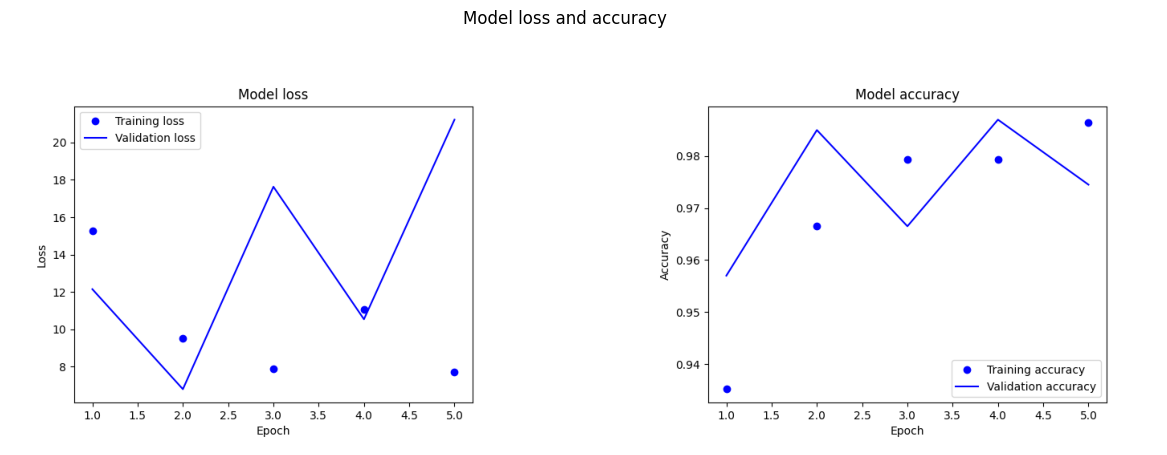

In [38]:
#plot the loss and accuracy graphs
plot_loss_accuracy(modelVGGCreated, modelVGG, 'modelVGG16')

2024-03-03 18:18:41.316180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 81s 1s/step - loss: 14.5549 - accuracy: 0.9775


2024-03-03 18:20:03.036861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 69s 1s/step
Results: [14.55486011505127, 0.9775000214576721]
Accuracy: 0.9775
F1 Score: 0.9774511623274429
Precision: 0.9783236972306552
Recall: 0.9775
Confusion Matrix:
 [[667   3   1]
 [  5 647  35]
 [  0   1 641]]


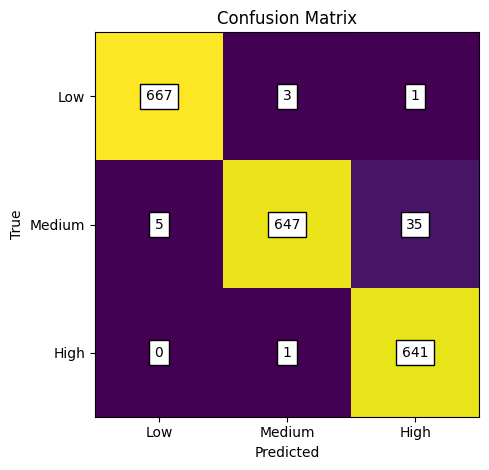

Model        modelVGG16
Accuracy         0.9775
F1 Score       0.977451
Precision      0.978324
Recall           0.9775
dtype: object

In [39]:
#evaluate the model
vgg_results = evaluate_model(modelVGG, X_test_vgg, y_test_vgg, 'modelVGG16')
vgg_results

  4/625 [..............................] - ETA: 10s - loss: 0.2836 - accuracy: 0.9844 

2024-03-03 18:21:15.567914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 12/625 [..............................] - ETA: 6s

2024-03-03 18:21:23.633450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 6s 9ms/step
Results: [0.13368579745292664, 0.9901000261306763]
Accuracy: 0.9901
F1 Score: 0.990102876024772
Precision: 0.9901181059577124
Recall: 0.9901
Confusion Matrix:
 [[6597   74    4]
 [  30 6637   55]
 [   1   34 6568]]


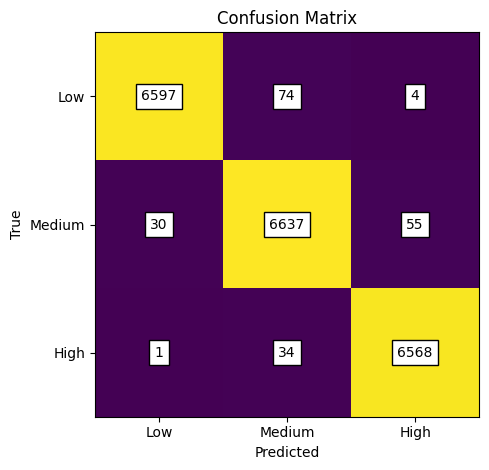

In [40]:
#evaluate the best model
best_model_results = evaluate_model(best_model, X_test, y_test, 'best_model')

(0.95, 1.0)

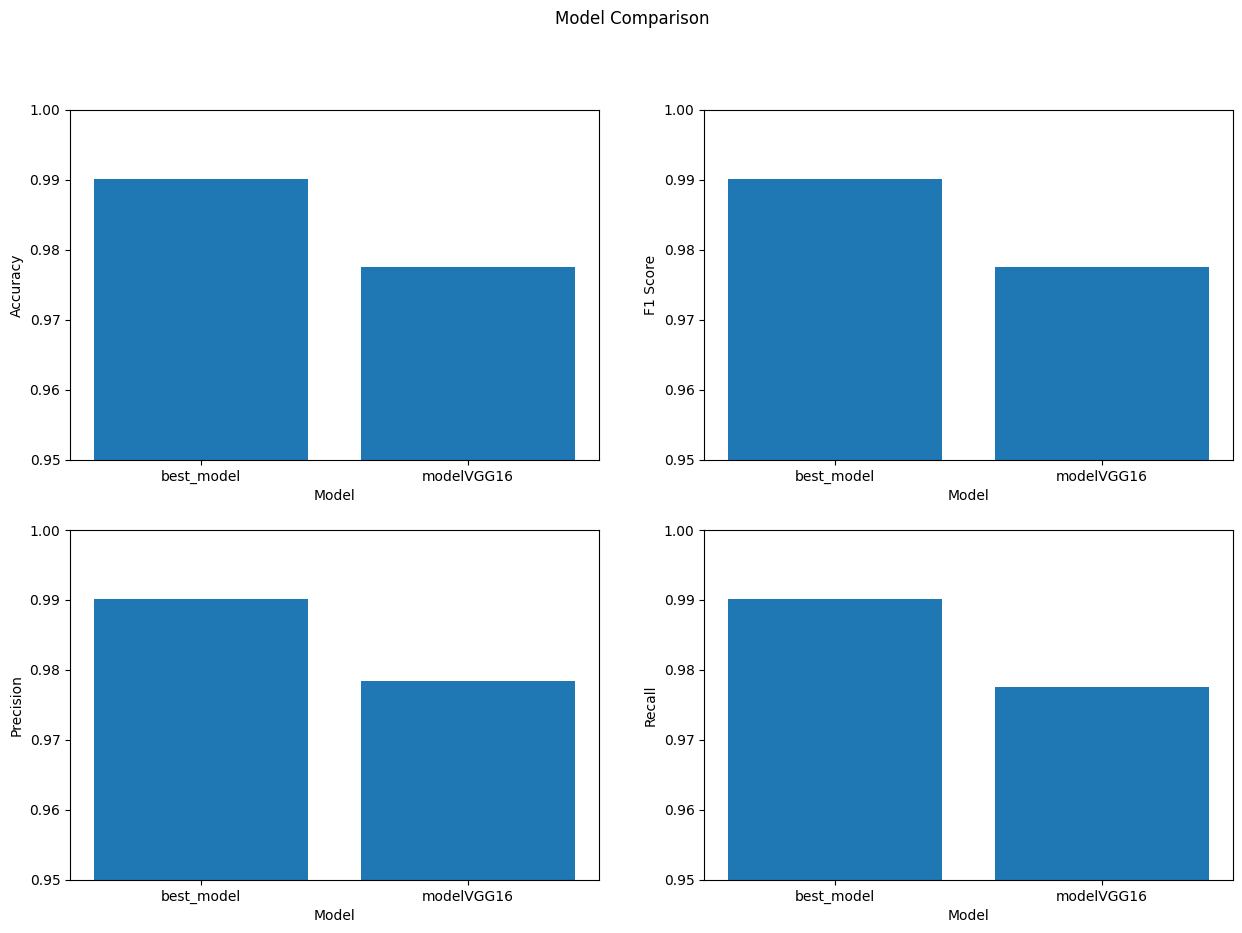

In [41]:
#plot the best models evaluation results against the vgg16 model
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
results_df.loc[len(results_df.index)] = best_model_results
results_df.loc[len(results_df.index)] = vgg_results

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Comparison')

axs[0,0].bar(results_df['Model'], results_df['Accuracy'], label='Accuracy')
axs[0,0].set_xlabel('Model')
axs[0,0].set_ylabel('Accuracy')
axs[0,0].set_ylim(0.95, 1.0)

axs[0,1].bar(results_df['Model'], results_df['F1 Score'], label='F1 Score')
axs[0,1].set_xlabel('Model')
axs[0,1].set_ylabel('F1 Score')
axs[0,1].set_ylim(0.95, 1.0)

axs[1,0].bar(results_df['Model'], results_df['Precision'], label='Precision')
axs[1,0].set_xlabel('Model')
axs[1,0].set_ylabel('Precision')
axs[1,0].set_ylim(0.95, 1.0)

axs[1,1].bar(results_df['Model'], results_df['Recall'], label='Recall')
axs[1,1].set_xlabel('Model')
axs[1,1].set_ylabel('Recall')
axs[1,1].set_ylim(0.95, 1.0)